In [207]:
!pip install kagglehub
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
!pip install missingpy
import missingno as msno
import matplotlib.pyplot as plt

import numpy as np
from sklearn.impute import SimpleImputer

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import shapiro
from scipy.stats import boxcox, yeojohnson
from scipy.stats.mstats import winsorize

# Análisis exploratorio de datos



In [208]:
ruta_archivo = "hotel_bookings.csv"
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "jessemostipak/hotel-booking-demand",
  ruta_archivo ,
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

/tmp/ipython-input-218964638.py:2: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'hotel-booking-demand' dataset.


## Estadisticos principales


In [209]:
print("Forma del dataset:", df.shape)

Forma del dataset: (119390, 32)


In [210]:
print("Tamaño total (n° de elementos):", df.size)

Tamaño total (n° de elementos): 3820480


In [211]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Notamos que hay datos nulos en la columna agent y company

In [213]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [214]:
columnas_describir = [
    'stays_in_weekend_nights',
    'previous_cancellations',
    'previous_bookings_not_canceled',
    'adults',
    'children',
    'booking_changes',
    'days_in_waiting_list',
    'required_car_parking_spaces',
    'total_of_special_requests'
]
display(df[columnas_describir].describe())

,stays_in_weekend_nights,previous_cancellations,previous_bookings_not_canceled,adults,children,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.927599,0.087118,0.137097,1.856403,0.103890,0.221124,2.321149,0.062518,0.571363
std,0.998613,0.844336,1.497437,0.579261,0.398561,0.652306,17.594721,0.245291,0.792798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,19.000000,26.000000,72.000000,55.000000,10.000000,21.000000,391.000000,8.000000,5.000000


Dado que el analisis es con respecto a todas las variables numericas consideramos convertir aquellas fechas en tipo de dato numerico a tipo de dato fecha

In [215]:
print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


In [216]:

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
display(df['reservation_status_date'].head())

,reservation_status_date
0,2015-07-01
1,2015-07-01
2,2015-07-02
3,2015-07-02
4,2015-07-03


In [217]:
display(df.nunique())

,0
hotel,2
is_canceled,2
lead_time,479
arrival_date_year,3
arrival_date_month,12
arrival_date_week_number,53
arrival_date_day_of_month,31
stays_in_weekend_nights,17
stays_in_week_nights,35
adults,14


In [218]:
display(df['children'].unique())

array([ 0.,  1.,  2., 10.,  3., nan])

No tiene sentido que la variable "children" sea float por lo que representa y además por los datos unicos donde ninguno utiliza decimales. Lo arreglamos después de tratar los valores nulos.

### Valores Faltantes


In [219]:
datos_faltantes = df.isnull().sum()
Porcentaje_faltante = (datos_faltantes / len(df)) * 100

info_faltante = pd.DataFrame({
    'Cantidad faltante': datos_faltantes,
    'Porcentaje faltante': Porcentaje_faltante
})

display(info_faltante[info_faltante['Cantidad faltante'] > 0])

,Cantidad faltante,Porcentaje faltante
children,4,0.003350
country,488,0.408744
agent,16340,13.686238
company,112593,94.306893


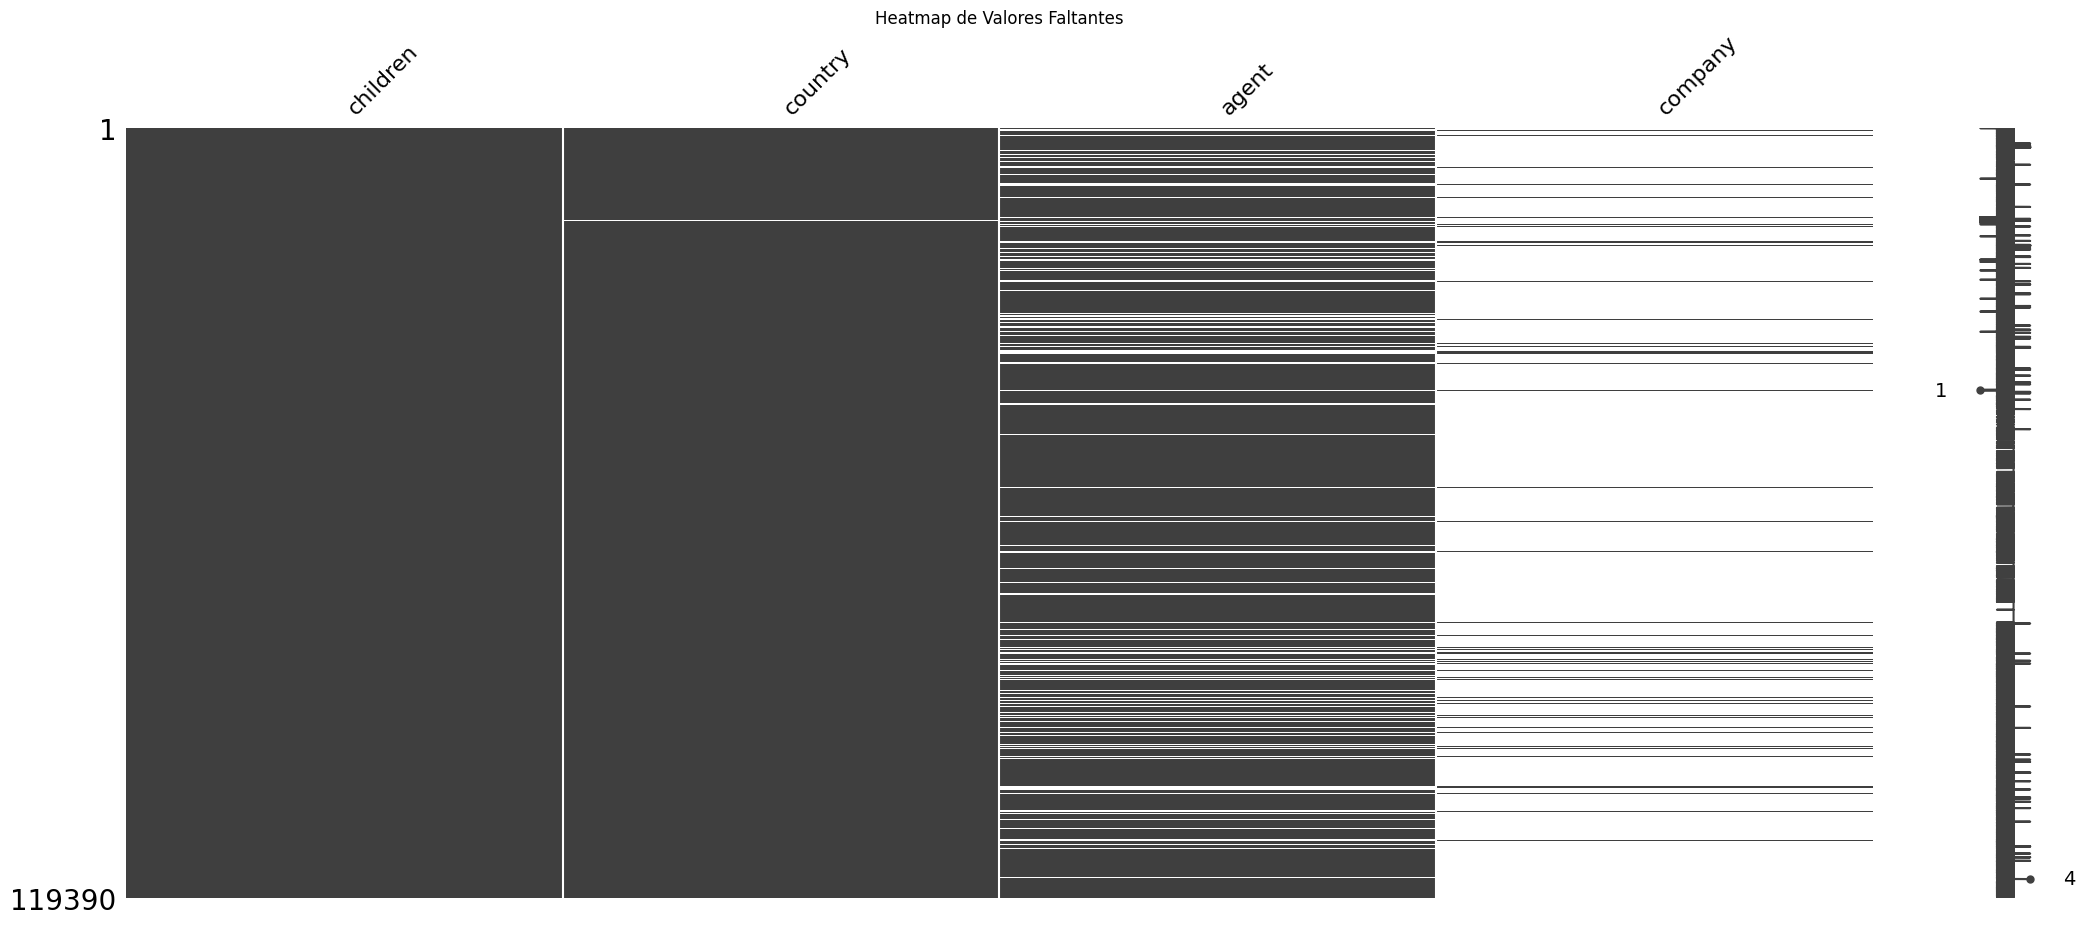

In [220]:

columnas_con_faltantes = ['children', 'country', 'agent', 'company']

msno.matrix(df[columnas_con_faltantes])
plt.title('Heatmap de Valores Faltantes')
plt.show()

In [221]:


def littles_mcar_test(df):
    # 1. Crear máscara de faltantes
    missing_mask = df.isnull()

    # 2. Imputar datos (media simple)
    imputer = SimpleImputer(strategy="mean")
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

    # 3. Calcular estadísticos
    patterns = missing_mask.drop_duplicates()
    chi_square = 0
    dof = 0
    for idx, pattern in patterns.iterrows():
        subset = df.loc[(missing_mask == pattern).all(axis=1)]
        if len(subset) == 0:
            continue
        means = df_imputed.loc[(missing_mask == pattern).all(axis=1)].mean()

        diffs = (subset.fillna(0) - means).fillna(0)

        chi_square += (diffs**2).sum().sum()
        dof += subset.shape[0] * subset.shape[1]
    if dof == 0:
        p_value = 1.0
    else:
        p_value = 1 - chi2.cdf(chi_square, dof)

    return chi_square, dof, p_value

# Seleccionar las columnas numéricas con datos faltantes
missing_values = df.isnull().sum()
missing_data_table = pd.DataFrame({
    'Cantidad Faltantes': missing_values,
    'Porcentaje Faltantes': (missing_values / len(df)) * 100
})

cols_with_missing_numeric = missing_data_table[missing_data_table['Cantidad Faltantes'] > 0].index.intersection(df.select_dtypes(include=np.number).columns).tolist()
df_missing_numeric = df[cols_with_missing_numeric]

# Aplicar la función del test de Little
chi_square_val, dof_val, p_value_val = littles_mcar_test(df_missing_numeric)

print(f"Resultados de la prueba de Little (Little's MCAR test) para columnas numéricas con datos faltantes:")
print(f"Estadístico Chi-cuadrado: {chi_square_val:.4f}")
print(f"Grados de libertad (DOF): {dof_val}")
print(f"Valor p: {p_value_val:.4f}")

alpha = 0.05
if p_value_val < alpha:
    print("\nEl valor p es menor que alpha (0.05), lo que sugiere que los datos no son MCAR (Missing Completely At Random). Es probable que sean MAR (Missing At Random) o MNAR (Missing Not At Random).")
else:
    print("\nEl valor p es mayor o igual que alpha (0.05), lo que sugiere que los datos pueden ser MCAR (Missing Completely At Random).")

Resultados de la prueba de Little (Little's MCAR test) para columnas numéricas con datos faltantes:
Estadístico Chi-cuadrado: 5534307878.4436
Grados de libertad (DOF): 358170
Valor p: 0.0000

El valor p es menor que alpha (0.05), lo que sugiere que los datos no son MCAR (Missing Completely At Random). Es probable que sean MAR (Missing At Random) o MNAR (Missing Not At Random).


In [222]:
# Paso 2: Codificar variables categóricas ('country', 'agent') para KNNImputer
encoders = {}
for col in ['country', 'agent']:
    if col in df_impute_temp.columns:
        df_impute_temp[col] = df_impute_temp[col].astype(str)
        le = LabelEncoder()
        le.fit(df_impute_temp[col].unique())
        df_impute_temp[col + '_encoded'] = le.transform(df_impute_temp[col])
        encoders[col] = le
        df_impute_temp.drop(columns=[col], inplace=True)

print("Variables categóricas codificadas. DataFrame temporal después de la codificación:")
display(df_impute_temp.head())

Variables categóricas codificadas. DataFrame temporal después de la codificación:


,children,country_encoded,agent_encoded
0,0,135,333
1,0,135,333
2,0,59,333
3,0,59,156
4,0,59,102


In [223]:
# Paso 3: Aplicar KNNImputer a las columnas numéricas y codificadas
n_neighbors = 5
imputer = KNNImputer(n_neighbors=n_neighbors)
df_imputed_array = imputer.fit_transform(df_impute_temp)
df_imputed_knn_temp = pd.DataFrame(df_imputed_array, columns=df_impute_temp.columns, index=df_impute_temp.index)

print(f"Imputación KNN completada con {n_neighbors} vecinos. Primeras filas del DataFrame imputado:")
display(df_imputed_knn_temp.head())

Imputación KNN completada con 5 vecinos. Primeras filas del DataFrame imputado:


,children,country_encoded,agent_encoded
0,0.0,135.0,333.0
1,0.0,135.0,333.0
2,0.0,59.0,333.0
3,0.0,59.0,156.0
4,0.0,59.0,102.0


In [224]:
# Paso 4: Invertir la codificación y actualizar el DataFrame original con los valores imputados
for original_col, le in encoders.items():
    encoded_col = original_col + '_encoded'
    df_imputed_knn_temp[encoded_col] = df_imputed_knn_temp[encoded_col].round().astype(int)
    inverse_mapping = {i: label for i, label in enumerate(le.classes_)}
    df_imputed_knn_temp[original_col] = df_imputed_knn_temp[encoded_col].map(inverse_mapping).fillna('Unknown')

    if original_col == 'agent':
        # Convertir 'agent' de nuevo a numérico, manejando 'Unknown' si se imputara un valor no mapeable
        df_imputed_knn_temp[original_col] = pd.to_numeric(df_imputed_knn_temp[original_col], errors='coerce')
        df_imputed_knn_temp[original_col] = df_imputed_knn_temp[original_col].fillna(0).astype(int)

    df[original_col] = df_imputed_knn_temp[original_col]

# Actualizar la columna 'children' en el DataFrame original y asegurarse de que sea de tipo entero
df['children'] = df_imputed_knn_temp['children'].round().astype('Int64')

print("Valores imputados invertidos y DataFrame original actualizado.")
display(df[vars_to_impute].head(10))

Valores imputados invertidos y DataFrame original actualizado.


,children,country,agent
0,0,PRT,0
1,0,PRT,0
2,0,GBR,0
3,0,GBR,304
4,0,GBR,240
5,0,GBR,240
6,0,PRT,0
7,0,PRT,303
8,0,PRT,240
9,0,PRT,15


In [225]:
# Paso 5: Verificación final de datos faltantes después de la imputación
print("Verificación de datos faltantes después de KNNImputer:")
print(df[vars_to_impute].isnull().sum())
print("\nPrimeras filas del DataFrame con datos imputados:")
display(df[vars_to_impute].head(10))

Verificación de datos faltantes después de KNNImputer:
children    0
country     0
agent       0
dtype: int64

Primeras filas del DataFrame con datos imputados:


,children,country,agent
0,0,PRT,0
1,0,PRT,0
2,0,GBR,0
3,0,GBR,304
4,0,GBR,240
5,0,GBR,240
6,0,PRT,0
7,0,PRT,303
8,0,PRT,240
9,0,PRT,15


#### Tratamiento de valores faltantes

Dado que el porcetaje de datos faltantes en 'company' es cercano al total (94.306893) y Kaggle no describe a que se refiere consideramos eliminar la columna dado que no contribuye al analisis. A partir del test de Little llegamos a que los datos faltantes no son completamente random por lo que optamos por imputar con KNN los datos faltantes de 'children', 'country' y 'agent'

In [226]:
# Paso 1: Seleccionar variables a imputar y crear un DataFrame temporal para el procesamiento
vars_to_impute = ['children', 'country', 'agent']
df_impute_temp = df[vars_to_impute].copy()

print("Variables a imputar: ", vars_to_impute)
print("DataFrame temporal creado para la imputación:")
display(df_impute_temp.head())

Variables a imputar:  ['children', 'country', 'agent']
DataFrame temporal creado para la imputación:


,children,country,agent
0,0,PRT,0
1,0,PRT,0
2,0,GBR,0
3,0,GBR,304
4,0,GBR,240


In [227]:

if 'company' in df.columns:
    df.drop('company', axis=1, inplace=True)
    print("Columna 'company' eliminada.")
else:
    print("Columna 'company' no esta en el DataFrame.")

print("Columnas en el DataFrame:")
display(df.columns)

Columna 'company' eliminada.
Columnas en el DataFrame:


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [228]:
#cambiamos el datatype de children a int
df['children'] = df['children'].astype('Int64')

# verificamos
print("Tipo de dato de columna 'children' :", df['children'].dtype)

Tipo de dato de columna 'children' : Int64


### Duplicados


In [229]:
duplicate_rows = df.duplicated()
num_duplicate_rows = duplicate_rows.sum()
percentage_duplicate_rows = (num_duplicate_rows / len(df)) * 100

print(f"Numero de filas duplicadas: {num_duplicate_rows}")
print(f"Porcentaje de columnas duplicadas: {percentage_duplicate_rows:.2f}%")

Numero de filas duplicadas: 30335
Porcentaje de columnas duplicadas: 25.41%


Dado que son duplicados en todas las variables de la fila no tendría sentido considerarlos para el analisis

In [230]:
# Elimina los duplicados, manteniendo la PRIMERA aparición (predeterminado: keep='first')
df.drop_duplicates(keep='first', inplace=True)

print(f"Number of rows after dropping duplicates: {len(df)}")

Number of rows after dropping duplicates: 89055


## Visualización de las distribuciones


Visualizando Distribuciones de Variables Numéricas (Boxplots individuales con escala ajustada automáticamente):


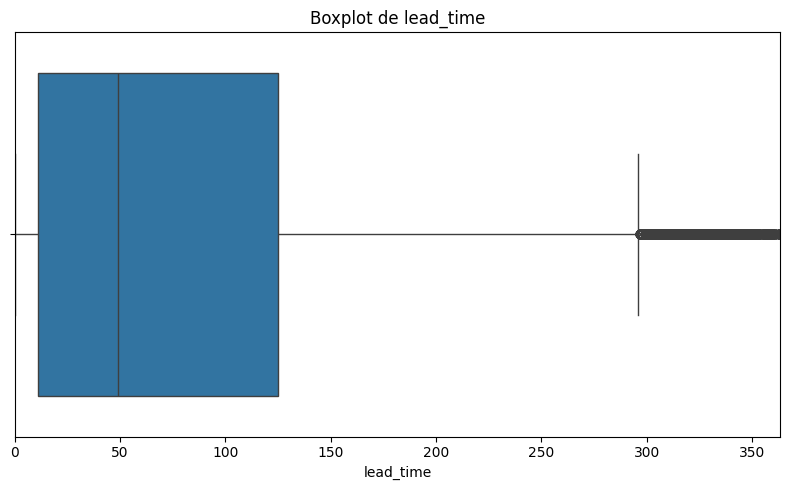

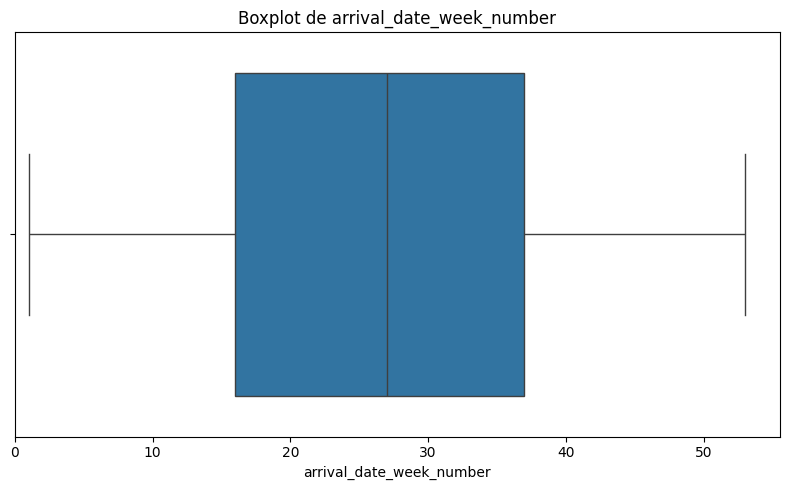

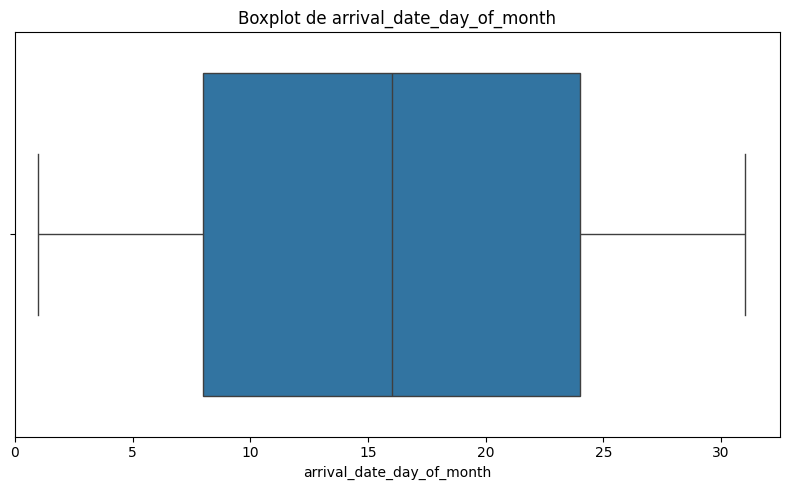

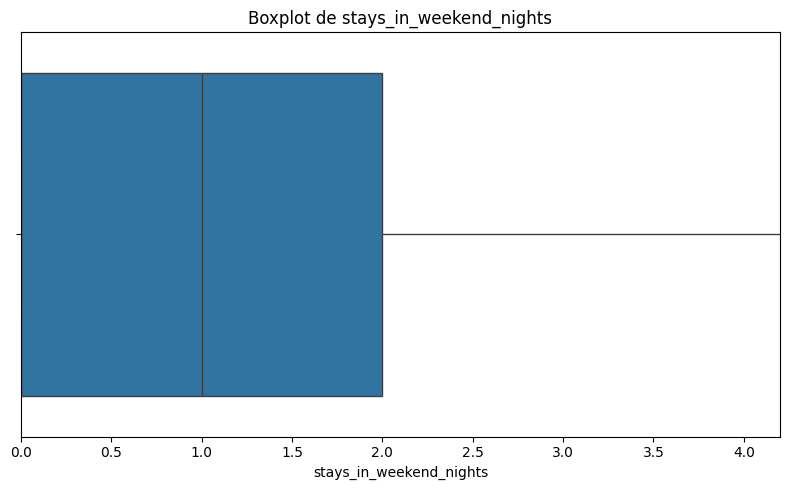

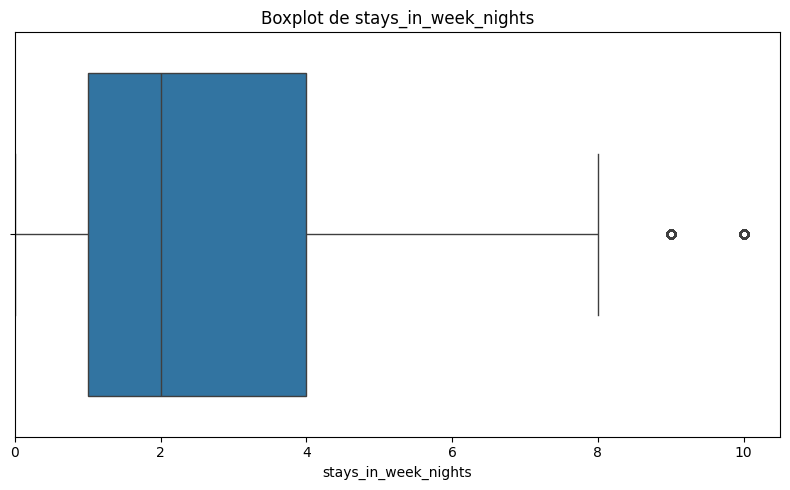

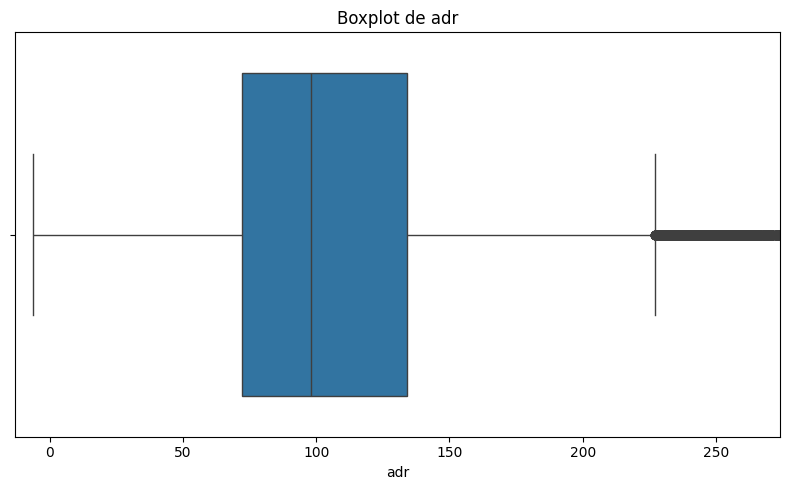

In [231]:

# Identificamos columnas numéricas que son binarias o tienen muy pocos valores únicos para graficar como barras.
# También excluimos 'arrival_date_year' y 'agent' como antes.
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Columnas que deberían ser visualizadas con barras (variables con pocos valores únicos o binarias)
binary_or_discrete_cols = [
    'is_canceled',
    'is_repeated_guest',
    'required_car_parking_spaces',
    'total_of_special_requests',
    'babies', # Suele tener pocos valores únicos
    'children', # Suele tener pocos valores únicos
    'adults' # Suele tener pocos valores únicos
]

# Boxplots:
print("Visualizando Distribuciones de Variables Numéricas (Boxplots individuales con escala ajustada automáticamente):")
# Para boxplots, es mejor graficar cada variable numérica individualmente para que la escala del eje X se ajuste
# y los outliers no 'aplasten' otras variables.
# Excluimos 'arrival_date_year', 'agent', las variables binarias/discretas y las columnas solicitadas por el usuario.
excluded_from_boxplots = [
    'arrival_date_year', 'agent',
    'previous_cancellations', 'previous_bookings_not_canceled',
    'booking_changes', 'days_in_waiting_list',
    'booking_changes_winsorized' # Excluir esta columna también
]
boxplot_cols = [col for col in numerical_cols if col not in excluded_from_boxplots and col not in binary_or_discrete_cols]

for col in boxplot_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)

    # Calcular límites basados en percentiles para ajustar la vista
    # Calculamos el 1er y 99o percentil para la columna
    lower_bound = df[col].quantile(0.01)
    upper_bound = df[col].quantile(0.99)

    # Añadir un pequeño margen a los límites para mejorar la visualización
    data_range = upper_bound - lower_bound
    margin = data_range * 0.05 # 5% de margen a cada lado

    # Asegurarse de que el límite inferior no sea negativo si la columna solo tiene valores no negativos
    if df[col].min() >= 0 and lower_bound - margin < 0:
        lower_bound_adjusted = 0
    else:
        lower_bound_adjusted = lower_bound - margin

    upper_bound_adjusted = upper_bound + margin

    plt.xlim(lower_bound_adjusted, upper_bound_adjusted)
    plt.tight_layout()
    plt.show()

Visualizando Distribuciones de Variables Numéricas (Histogramas):


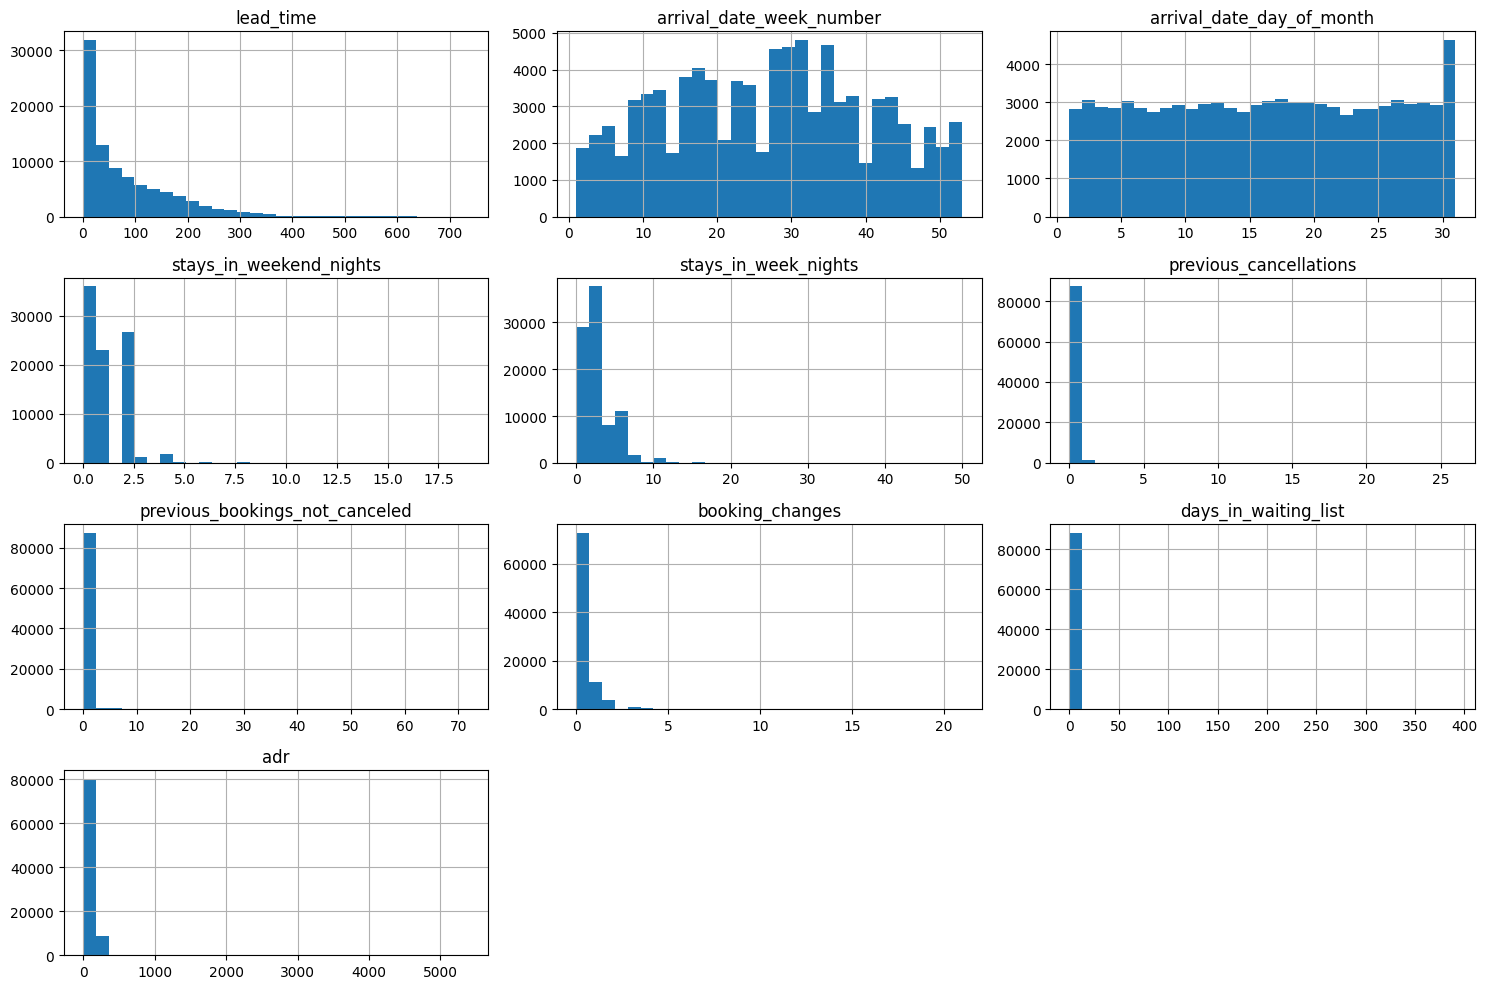

In [232]:

# Histograma:
# Identificamos columnas numéricas que son binarias o tienen muy pocos valores únicos para graficar como barras.
# También excluimos 'arrival_date_year' y 'agent' como antes.
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Columnas que deberían ser visualizadas con barras (variables con pocos valores únicos o binarias)
binary_or_discrete_cols = [
    'is_canceled',
    'is_repeated_guest',
    'required_car_parking_spaces',
    'total_of_special_requests',
    'babies', # Suele tener pocos valores únicos
    'children', # Suele tener pocos valores únicos
    'adults' # Suele tener pocos valores únicos
]

# Filtramos las columnas numéricas para histogramas (excluyendo las binarias/discretas y las ya excluidas)
numerical_cols_for_hist = [col for col in numerical_cols
                           if col not in ['arrival_date_year', 'agent']
                           and col not in binary_or_discrete_cols]

print("Visualizando Distribuciones de Variables Numéricas (Histogramas):")
if numerical_cols_for_hist:
    df[numerical_cols_for_hist].hist(bins=30, figsize=(15, 10))
    plt.tight_layout()
    plt.show()
else:
    print("No hay columnas numéricas adecuadas para histogramas después de la exclusión.")

Visualizando Distribuciones de Variables Numéricas Discretas/Binarias (Gráficos de Barras):


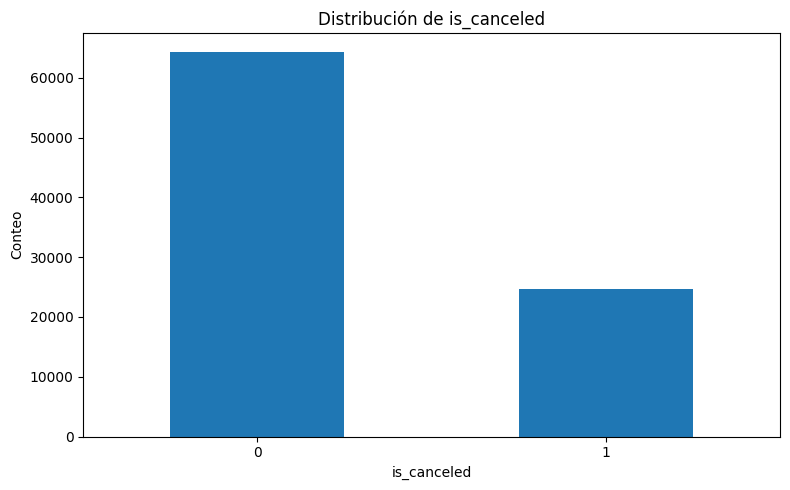

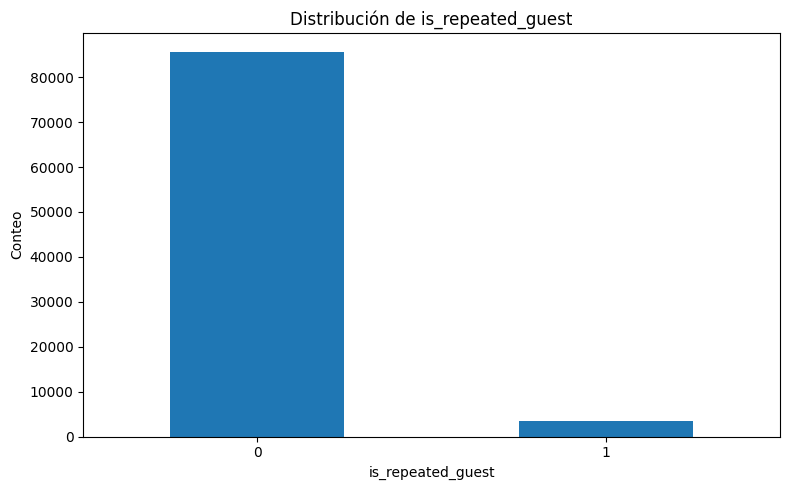

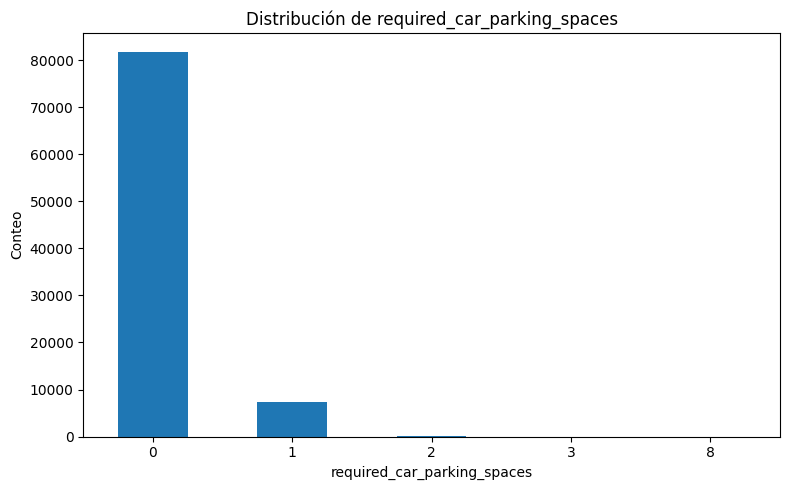

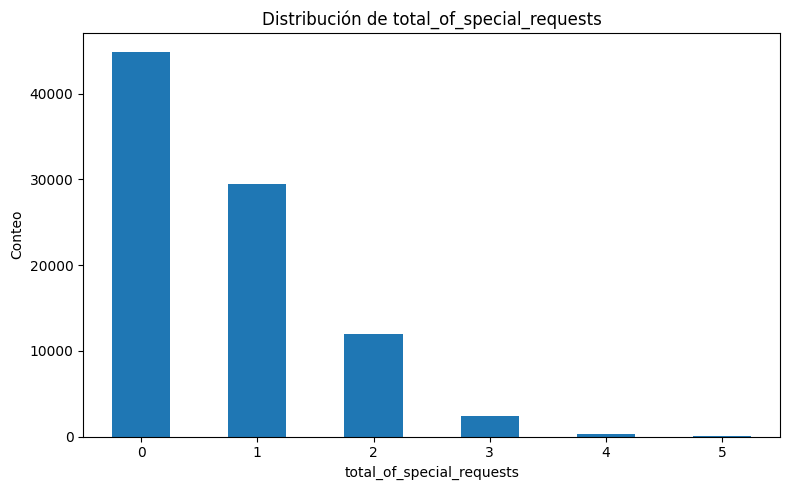

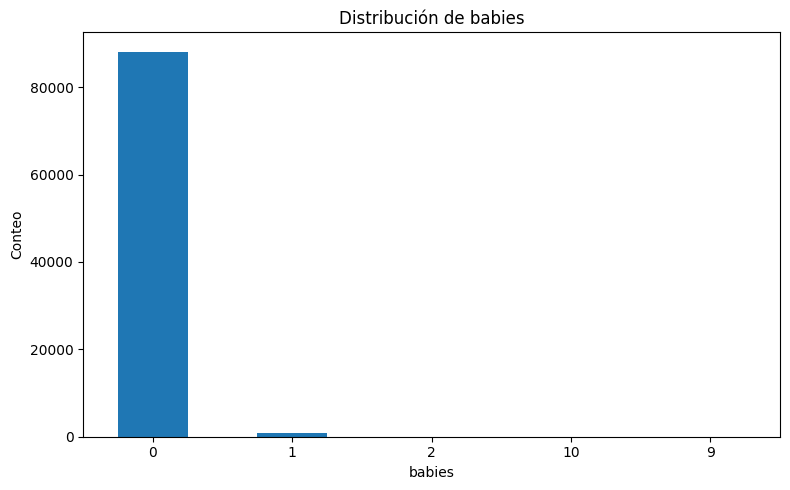

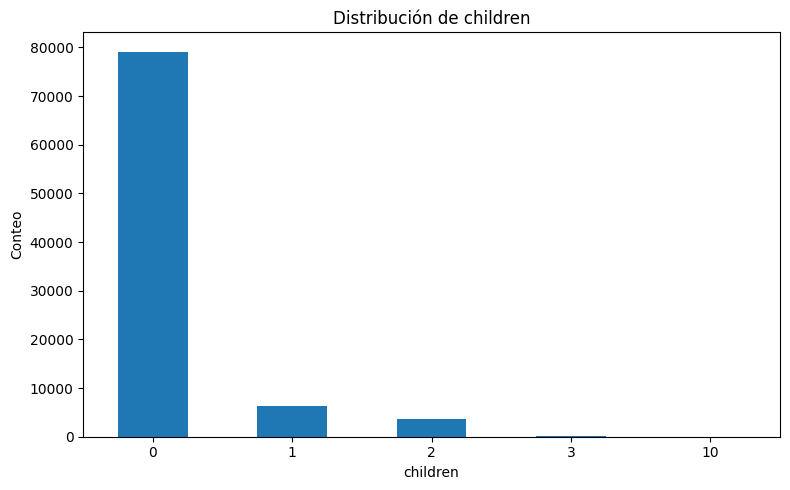

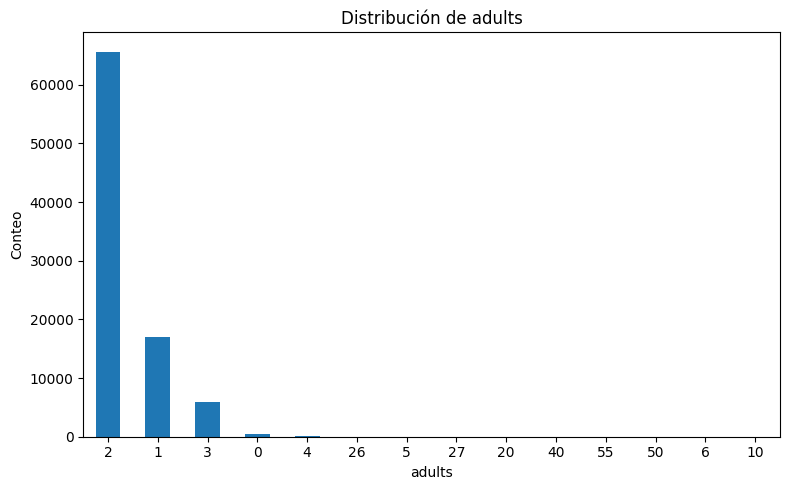


Visualizando Distribuciones de Variables Categóricas (Gráficos de Barras):


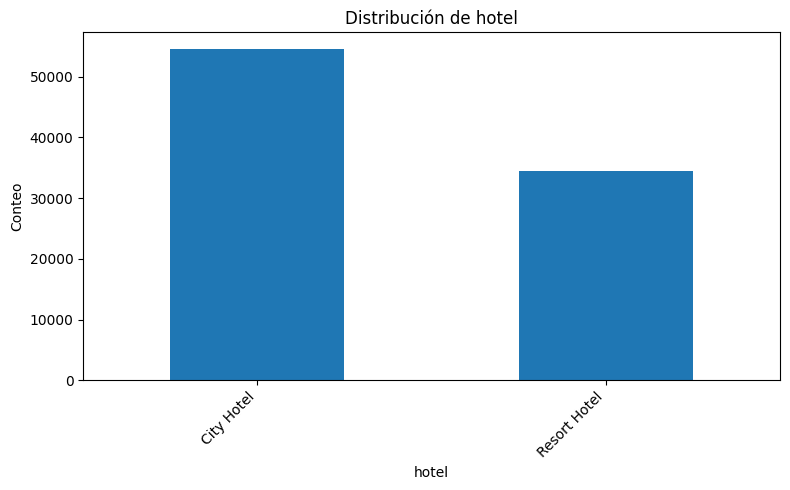

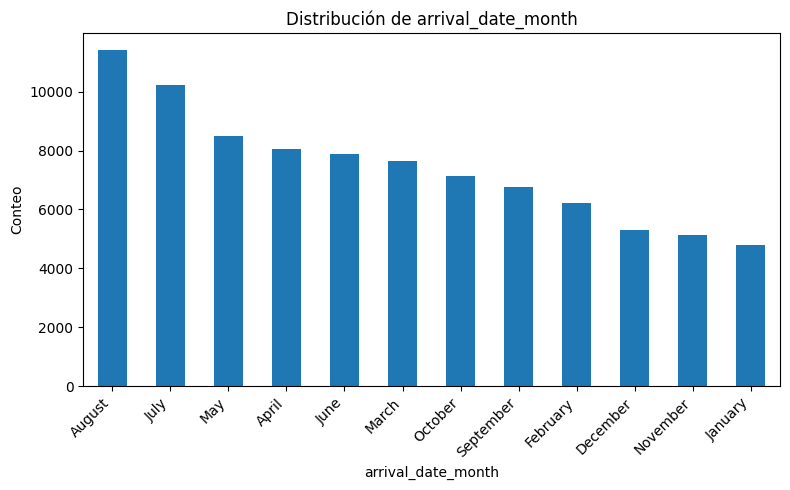

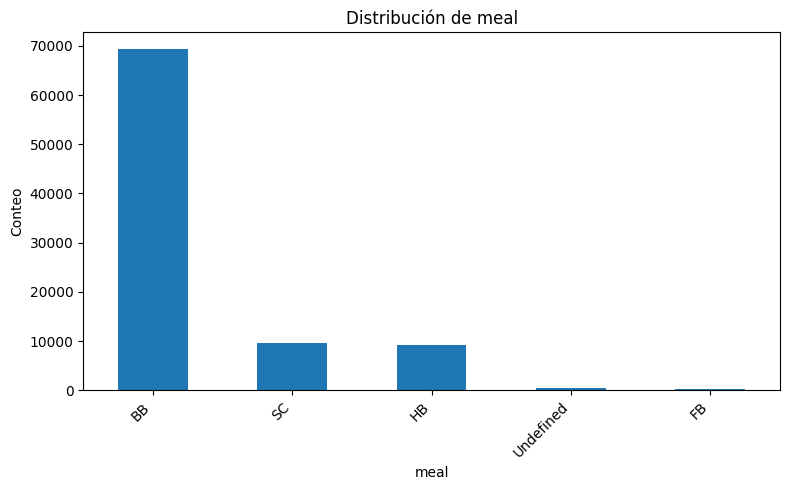

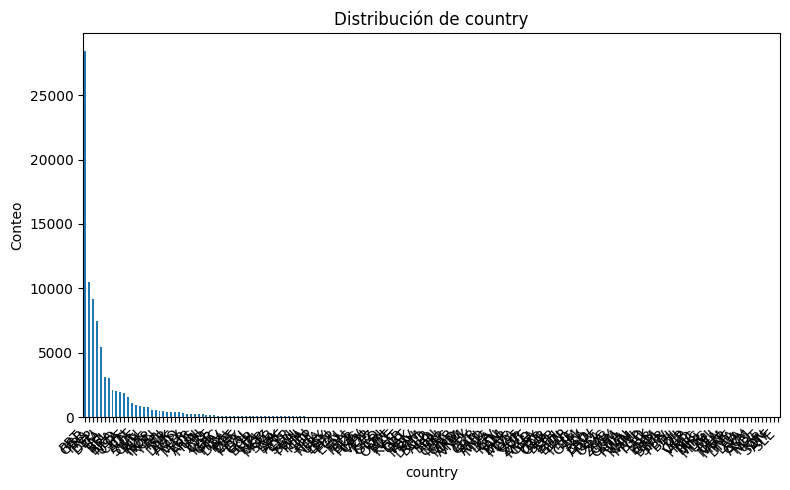

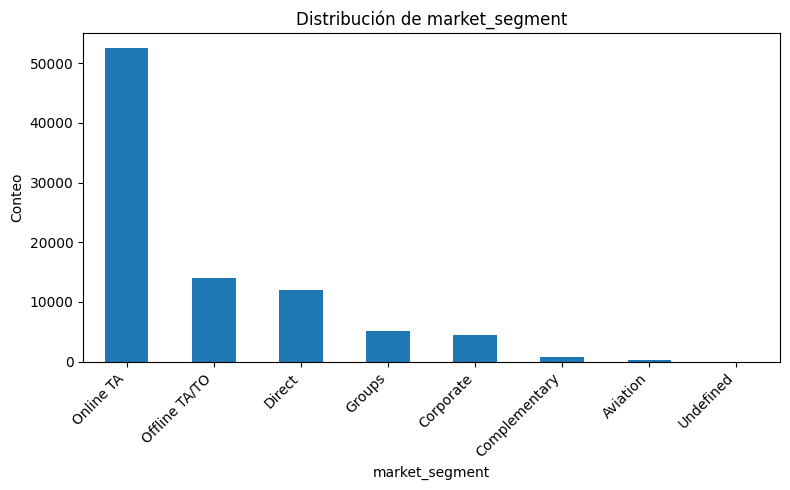

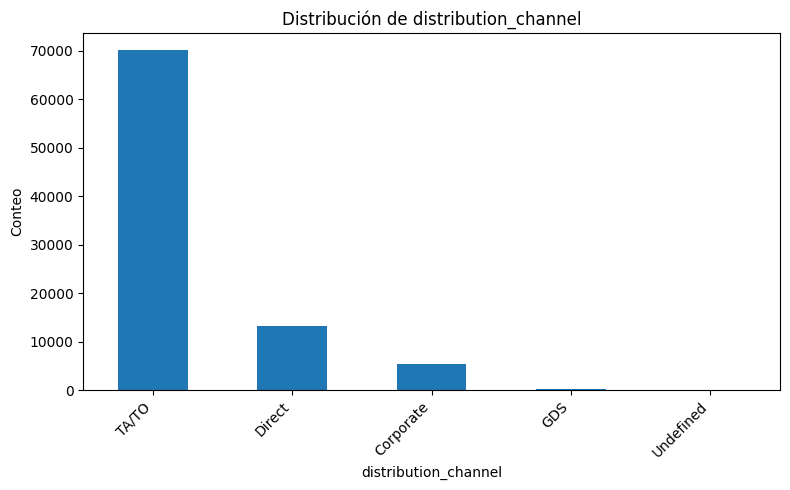

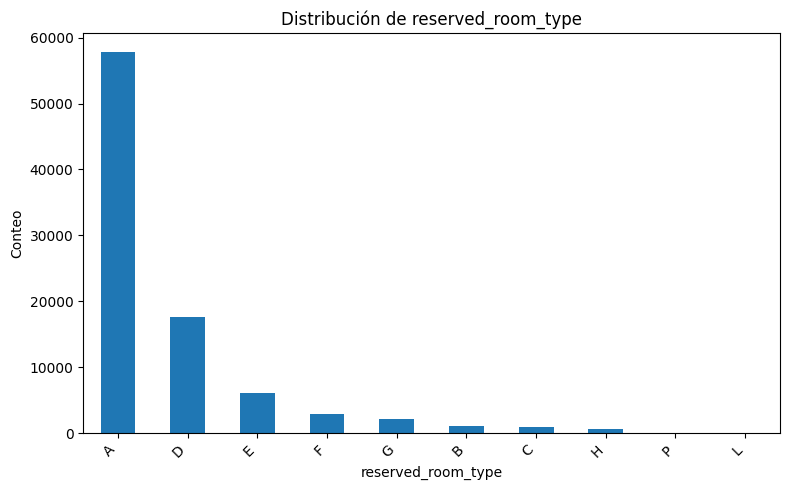

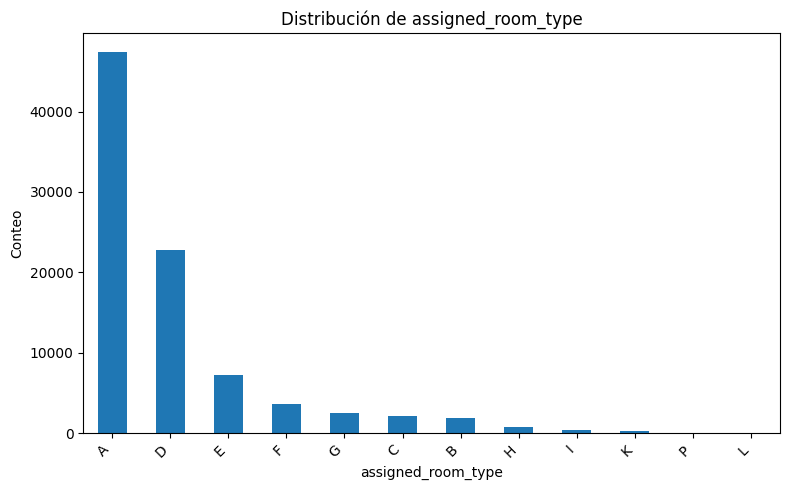

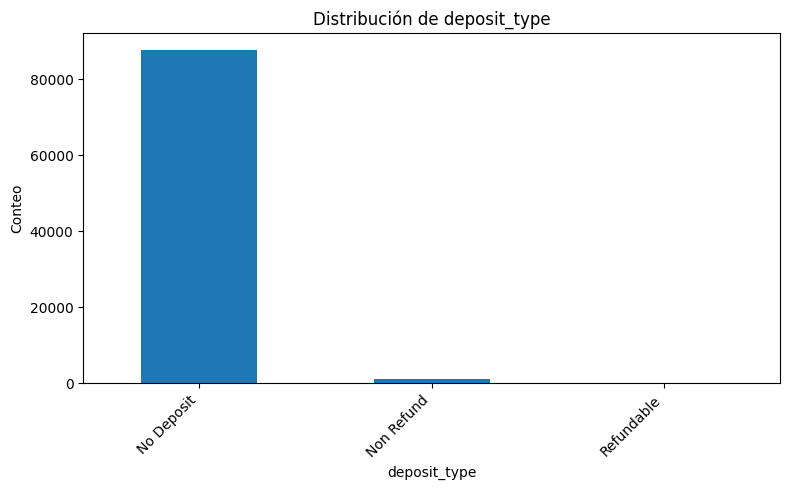

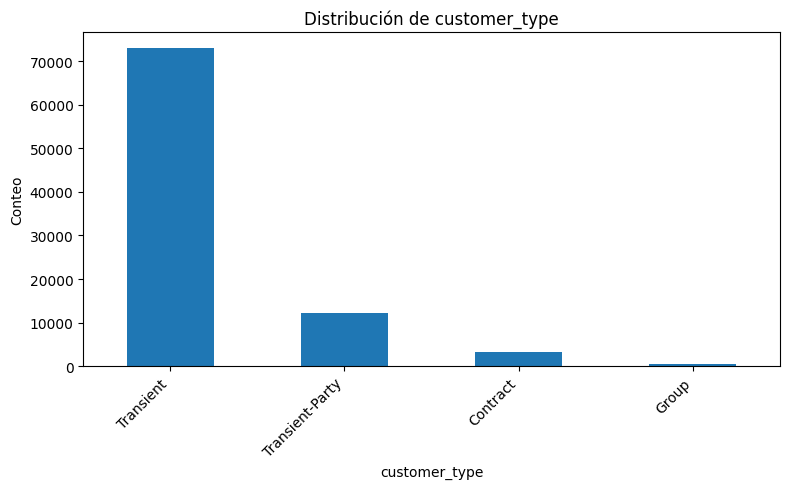

In [233]:

# Gráficos de barras:
# Identificamos columnas numéricas que son binarias o tienen muy pocos valores únicos para graficar como barras.
# También excluimos 'arrival_date_year' y 'agent' como antes.
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Columnas que deberían ser visualizadas con barras (variables con pocos valores únicos o binarias)
binary_or_discrete_cols = [
    'is_canceled',
    'is_repeated_guest',
    'required_car_parking_spaces',
    'total_of_special_requests',
    'babies', # Suele tener pocos valores únicos
    'children', # Suele tener pocos valores únicos
    'adults' # Suele tener pocos valores únicos
]

print("Visualizando Distribuciones de Variables Numéricas Discretas/Binarias (Gráficos de Barras):")
# Creamos gráficos de barras para las columnas binarias o discretas con pocos valores únicos
for col in binary_or_discrete_cols:
    plt.figure(figsize=(8, 5))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Conteo')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols_for_viz = [col for col in categorical_cols if col not in ['reservation_status', 'reservation_status_date']]

print("\nVisualizando Distribuciones de Variables Categóricas (Gráficos de Barras):")
for col in categorical_cols_for_viz:
    plt.figure(figsize=(8, 5))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Conteo')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-389983946.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_countries.index, y=top_20_countries.values, palette='viridis')


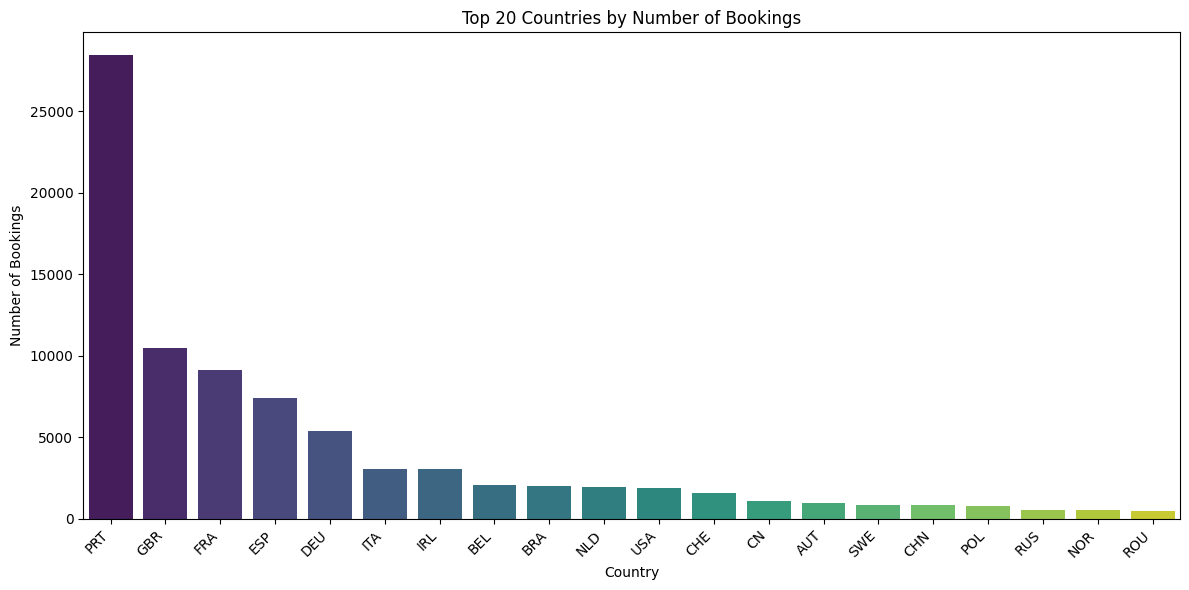

In [234]:

# top 20 paises
top_20_countries = df['country'].value_counts().nlargest(20)

# bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_countries.index, y=top_20_countries.values, palette='viridis')
plt.title('Top 20 Countries by Number of Bookings')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Visualizing Boxplots of Selected Numerical Variables (Separately):


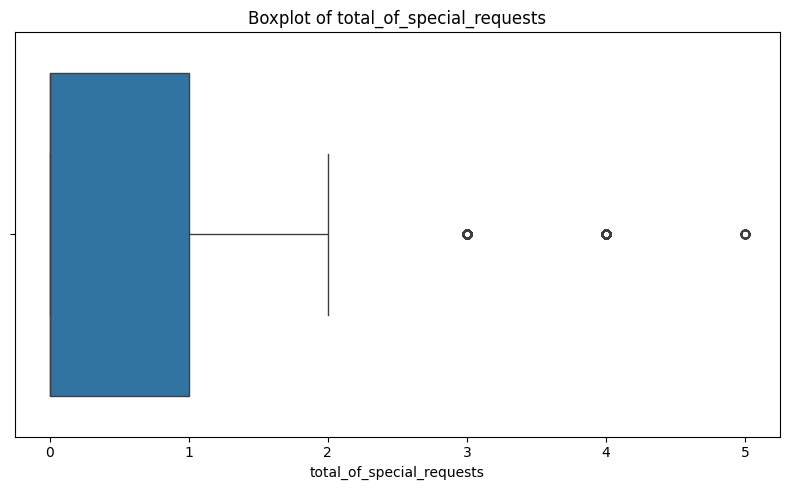

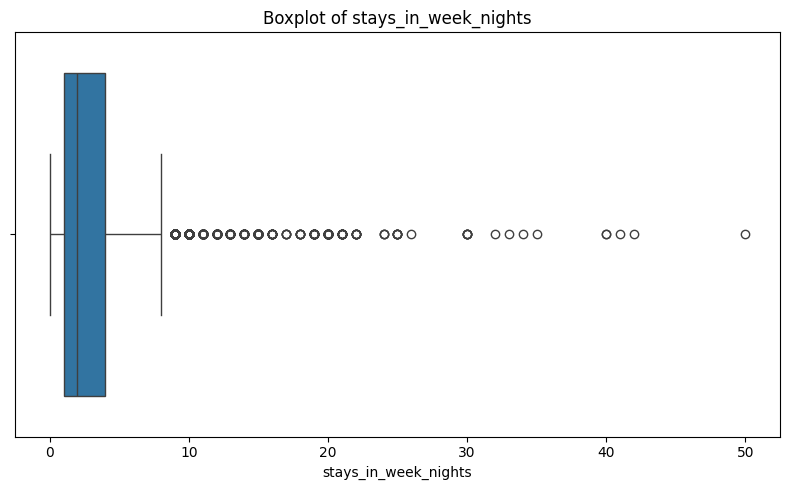

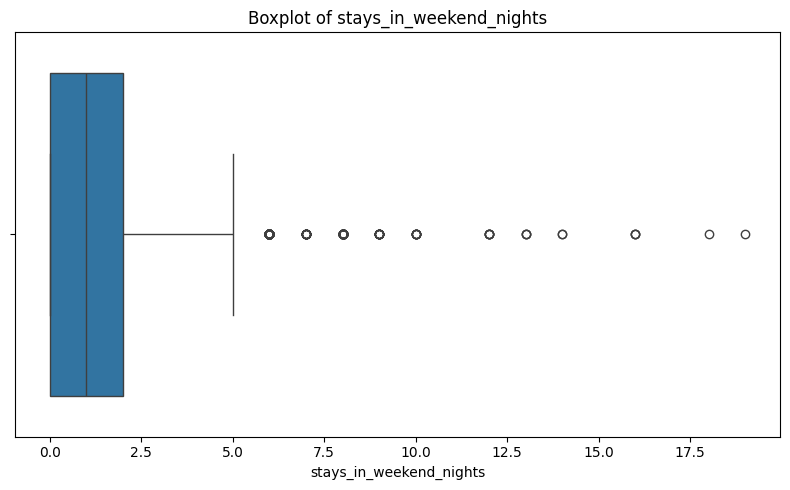

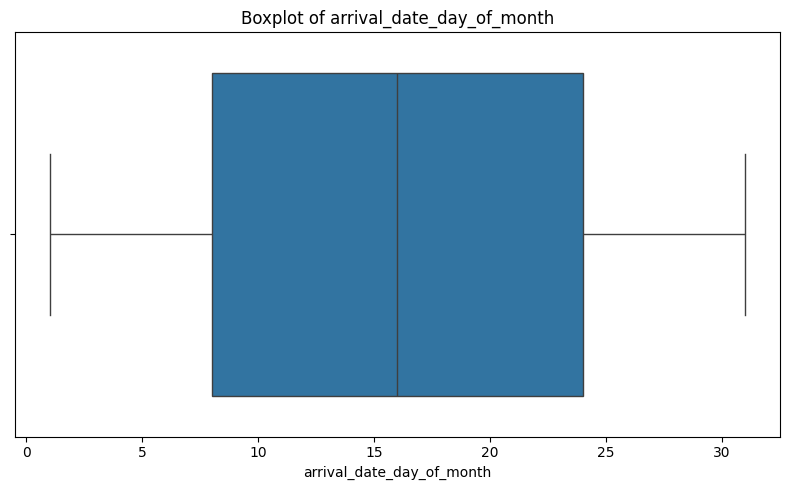

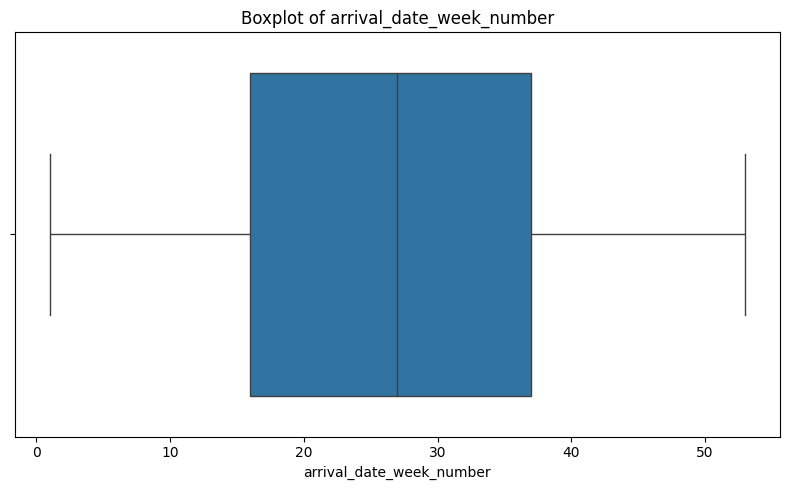

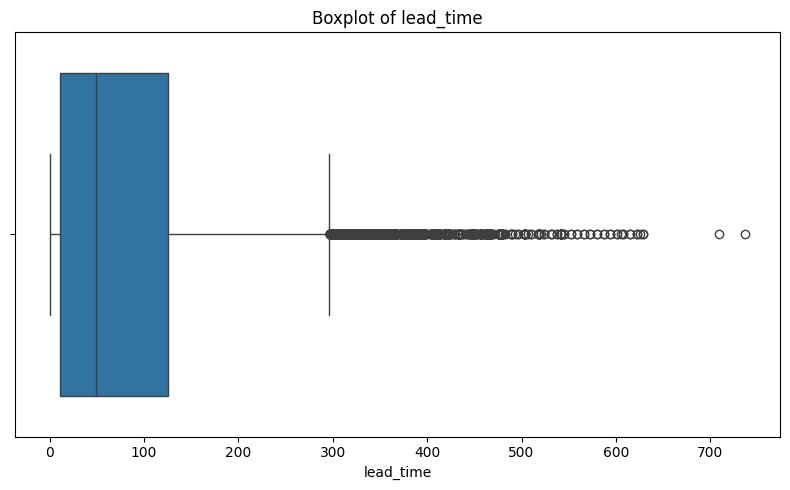

In [235]:

numerical_cols_for_viz = [
    'total_of_special_requests',
    'stays_in_week_nights',
    'stays_in_weekend_nights',
    'arrival_date_day_of_month',
    'arrival_date_week_number',
    'lead_time'
]

print("Visualizing Boxplots of Selected Numerical Variables (Separately):")

for col in numerical_cols_for_viz:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

##Outliers

In [236]:


# Seleccionamos las columnas numericas para detectar outliers.
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols_for_outliers = [col for col in numerical_cols if col not in ['arrival_date_year', 'agent']] # Excluded agent as it's more of an ID

outlier_info = {}

for col in numerical_cols_for_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = len(outliers)
    percentage_outliers = (num_outliers / len(df)) * 100

    outlier_info[col] = {
        'Number of Outliers': num_outliers,
        'Percentage of Outliers': percentage_outliers
    }

outlier_df = pd.DataFrame.from_dict(outlier_info, orient='index')
outlier_df = outlier_df.sort_values(by='Percentage of Outliers', ascending=False) # Sort by percentage

print("Number and Percentage of Outliers per Numerical Variable (IQR Method):")
display(outlier_df)

Number and Percentage of Outliers per Numerical Variable (IQR Method):


,Number of Outliers,Percentage of Outliers
adults,23411,26.288249
booking_changes,16087,18.064118
children,9906,11.123463
required_car_parking_spaces,7352,8.255572
previous_bookings_not_canceled,3569,4.007636
is_repeated_guest,3450,3.874010
total_of_special_requests,2714,3.047555
adr,2513,2.821852
lead_time,2426,2.724159
previous_cancellations,1763,1.979675


In [237]:

# Obtenemos la lista de columnas numéricas con valores atípicos del análisis previo
# Podemos usar el índice del DataFrame outlier_df (creado en la celda nHLBNrG0eeJf)
# Excluimos las columnas que no fueron consideradas para la detección de valores atípicos (como el año y el agente)
cols_with_outliers = outlier_df.index.tolist()
cols_to_test_normality = [col for col in cols_with_outliers if col not in ['arrival_date_year', 'agent']]

print("Prueba de Shapiro-Wilk para la Normalidad en Variables con Valores Atípicos:")

# Realizamos la prueba de Shapiro-Wilk para cada columna seleccionada
# La prueba de Shapiro-Wilk es sensible al tamaño de la muestra. Para grandes conjuntos de datos,
# casi siempre rechaza la hipótesis nula de normalidad.
# Es una práctica común muestrear alrededor de 1000-5000 puntos de datos para Shapiro-Wilk
normality_test_results = {}
for col in cols_to_test_normality:
    if len(df[col]) > 5000:
        sample_data = df[col].sample(n=5000, random_state=42).dropna() # Muestrear y eliminar NaNs
    else:
        sample_data = df[col].dropna() # Eliminar NaNs si no se muestrea

    if len(sample_data) > 0:
        try:
            stat, p_value = shapiro(sample_data)
            normality_test_results[col] = {'Estadístico Shapiro': stat, 'Valor p': p_value}
        except Exception as e:
            normality_test_results[col] = {'Estadístico Shapiro': 'Error', 'Valor p': 'Error', 'Mensaje de Error': str(e)}
    else:
         normality_test_results[col] = {'Estadístico Shapiro': np.nan, 'Valor p': np.nan, 'Mensaje de Error': 'No hay datos después de eliminar NaNs'}


# Mostramos los resultados
normality_df = pd.DataFrame.from_dict(normality_test_results, orient='index')

# Agregamos una columna que indica la normalidad basada en el valor p
alpha = 0.05
normality_df['Es_Normal'] = normality_df['Valor p'].apply(lambda x: 'Sí' if x >= alpha else ('No' if x < alpha else 'N/A'))


display(normality_df)

# Interpretación:
# Un valor p bajo (típicamente < 0.05) indica el rechazo de la hipótesis nula de normalidad.
# Debido al gran tamaño de la muestra, incluso con muestreo, se esperan valores p bajos para la mayoría de las variables,
# confirmando la no normalidad que a menudo es visualmente aparente con los valores atípicos.


Prueba de Shapiro-Wilk para la Normalidad en Variables con Valores Atípicos:


,Estadístico Shapiro,Valor p,Es_Normal
adults,0.500245,3.872027e-80,No
booking_changes,0.447896,2.626346e-82,No
children,0.349860,6.267922e-86,No
required_car_parking_spaces,0.307814,2.439024e-87,No
previous_bookings_not_canceled,0.070641,3.993267e-94,No
is_repeated_guest,0.182160,3.777157e-91,No
total_of_special_requests,0.770137,3.019834e-64,No
adr,0.961442,1.589118e-34,No
lead_time,0.837458,9.801833e-58,No
previous_cancellations,0.081391,7.485130e-94,No


In [238]:

# Obtenemos la lista de columnas numéricas con valores atípicos del análisis previo
# Podemos usar el índice del DataFrame outlier_df (creado en la celda nHLBNrG0eeJf)
cols_with_outliers = outlier_df.index.tolist()
cols_to_transform = [col for col in cols_with_outliers if col not in ['arrival_date_year', 'agent', 'is_canceled', 'arrival_date_week_number', 'arrival_date_day_of_month']] # Excluimos columnas binarias, año y columnas tipo ID, y aquellas sin valores atípicos

# Aplicamos la transformación (Box-Cox o Yeo-Johnson) y creamos nuevas columnas
df_transformed = df.copy()
transformed_cols_info = {}

print("Aplicando transformación y verificando valores atípicos en columnas transformadas:")

for col in cols_to_transform:
    # Aseguramos que la serie no tenga valores NaN antes de calcular min_value o aplicar la transformación
    col_data = df_transformed[col].dropna()
    min_value = col_data.min()

    if len(col_data) == 0:
        print(f"Advertencia: La columna '{col}' no tiene datos finitos para transformar después de eliminar NaNs. Se saltará.")
        continue

    if min_value < 0:
        # Usamos la transformación de Yeo-Johnson para valores negativos
        transformed_data, lambda_value = yeojohnson(col_data)
        new_col_name = f"{col}_yeojohnson"
        transform_type = "Yeo-Johnson"
    elif min_value == 0:
         # Usamos Yeo-Johnson para valores cero, ya que Box-Cox +1 a veces es problemático
        transformed_data, lambda_value = yeojohnson(col_data)
        new_col_name = f"{col}_yeojohnson"
        transform_type = "Yeo-Johnson"
    else:
        # Usamos Box-Cox para valores estrictamente positivos
        transformed_data, lambda_value = boxcox(col_data)
        new_col_name = f"{col}_boxcox"
        transform_type = "Box-Cox"

    # Asegurarse de rellenar los NaNs originales con el valor transformado correspondiente o NaN si no se pudo transformar
    # Aquí rellenamos con NaN, ya que los valores originales con NaN no tenían un valor para transformar.
    df_transformed[new_col_name] = pd.Series(transformed_data, index=col_data.index)
    df_transformed[new_col_name] = df_transformed[new_col_name].reindex(df_transformed.index)

    transformed_cols_info[col] = {'Transformed_Column': new_col_name, 'Transformation_Type': transform_type, 'Lambda': lambda_value}

    # Ahora, volvemos a verificar los valores atípicos en la columna transformada usando el método IQR
    # Asegurarse de trabajar con datos no NaN para los cuantiles y el cálculo de outliers
    transformed_col_data_no_nan = df_transformed[new_col_name].dropna()
    if not transformed_col_data_no_nan.empty:
        Q1_transformed = transformed_col_data_no_nan.quantile(0.25)
        Q3_transformed = transformed_col_data_no_nan.quantile(0.75)
        IQR_transformed = Q3_transformed - Q1_transformed

        lower_bound_transformed = Q1_transformed - 1.5 * IQR_transformed
        upper_bound_transformed = Q3_transformed + 1.5 * IQR_transformed

        outliers_transformed = transformed_col_data_no_nan[(transformed_col_data_no_nan < lower_bound_transformed) | (transformed_col_data_no_nan > upper_bound_transformed)]
        num_outliers_transformed = len(outliers_transformed)
        percentage_outliers_transformed = (num_outliers_transformed / len(df_transformed)) * 100 # Porcentaje sobre el total original
    else:
        num_outliers_transformed = 0
        percentage_outliers_transformed = 0.0


    transformed_cols_info[col].update({
        'Number of Outliers (Transformed)': num_outliers_transformed,
        'Percentage of Outliers (Transformed)': percentage_outliers_transformed
    })

# Mostramos la información de los valores atípicos para las columnas transformadas
transformed_outlier_df = pd.DataFrame.from_dict(transformed_cols_info, orient='index')
transformed_outlier_df = transformed_outlier_df.sort_values(by='Percentage of Outliers (Transformed)', ascending=False)

display(transformed_outlier_df)

# Nota: Aunque las transformaciones pueden ayudar con la no normalidad y a menudo reducen los valores atípicos,
# puede que no eliminen todos los valores atípicos, especialmente en las colas de la distribución.
# El método de Tukey (IQR) aún podría identificar valores como atípicos incluso después de la transformación.


Aplicando transformación y verificando valores atípicos en columnas transformadas:


,Transformed_Column,Transformation_Type,Lambda,Number of Outliers (Transformed),Percentage of Outliers (Transformed)
adults,adults_yeojohnson,Yeo-Johnson,0.383723,23411,26.288249
booking_changes,booking_changes_yeojohnson,Yeo-Johnson,-6.140413,16087,18.064118
children,children_yeojohnson,Yeo-Johnson,-10.598989,9906,11.123463
required_car_parking_spaces,required_car_parking_spaces_yeojohnson,Yeo-Johnson,-17.418016,7352,8.255572
previous_bookings_not_canceled,previous_bookings_not_canceled_yeojohnson,Yeo-Johnson,-18.792948,3569,4.007636
is_repeated_guest,is_repeated_guest_yeojohnson,Yeo-Johnson,-37.240349,3450,3.874010
adr,adr_yeojohnson,Yeo-Johnson,0.622167,3240,3.638201
previous_cancellations,previous_cancellations_yeojohnson,Yeo-Johnson,-53.738780,1763,1.979675
babies,babies_yeojohnson,Yeo-Johnson,-63.389977,915,1.027455
days_in_waiting_list,days_in_waiting_list_yeojohnson,Yeo-Johnson,-26.049241,865,0.971310


In [239]:
df["adults"].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10])

In [240]:
df["children"].unique()

<IntegerArray>
[0, 1, 2, 10, 3]
Length: 5, dtype: Int64

In [241]:
df["booking_changes"].unique()

array([ 3,  4,  0,  1,  2,  5, 17,  6,  8,  7, 10, 16,  9, 13, 12, 20, 14,
       15, 11, 21, 18])

Unique values of original 'booking_changes' column:


array([ 3,  4,  0,  1,  2,  5, 17,  6,  8,  7, 10, 16,  9, 13, 12, 20, 14,
       15, 11, 21, 18])


Unique values of winsorized 'booking_changes_winsorized' column:


array([2, 0, 1])

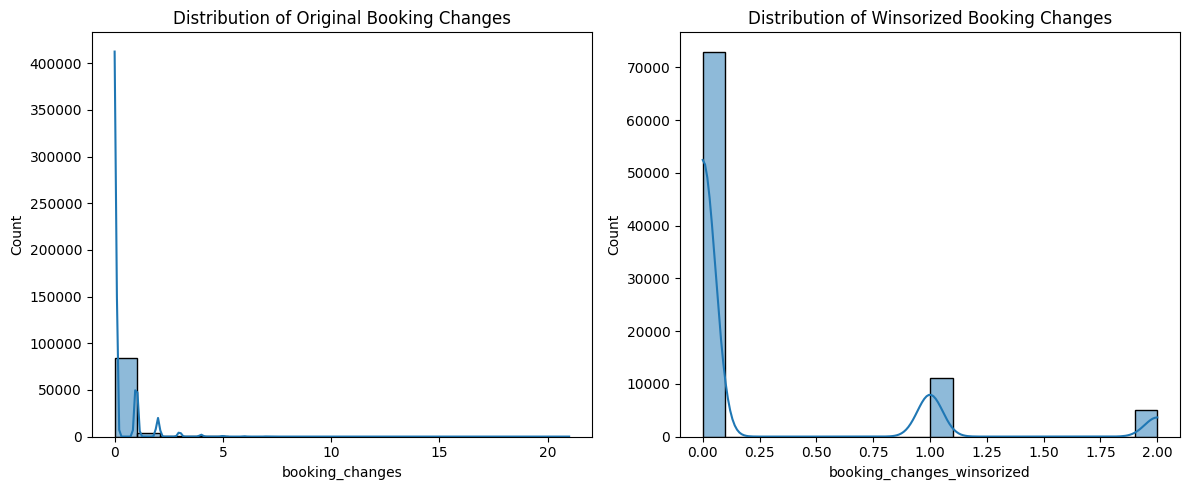

In [242]:

df['booking_changes_winsorized'] = winsorize(df['booking_changes'], limits=[0, 0.05])

print("Unique values of original 'booking_changes' column:")
display(df['booking_changes'].unique())

print("\nUnique values of winsorized 'booking_changes_winsorized' column:")
display(df['booking_changes_winsorized'].unique())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['booking_changes'], bins=20, kde=True)
plt.title('Distribution of Original Booking Changes')

plt.subplot(1, 2, 2)
sns.histplot(df['booking_changes_winsorized'], bins=20, kde=True)
plt.title('Distribution of Winsorized Booking Changes')

plt.tight_layout()
plt.show()

Primero apliamos Box-cox para normalizar las variables. Consideramos que tanto adults como children tienen valores posibles y reales, por lo que los mantendremos como estan. En el caso de booking_changes decidimos winsorizar.

Decidimos no imputar required_car_parking_spaces, previous_bookings_not_canceled, is_repeated_guest, adr, dado que los valores tiene sentido dado el contexto de la base.

## Analisis multivariado

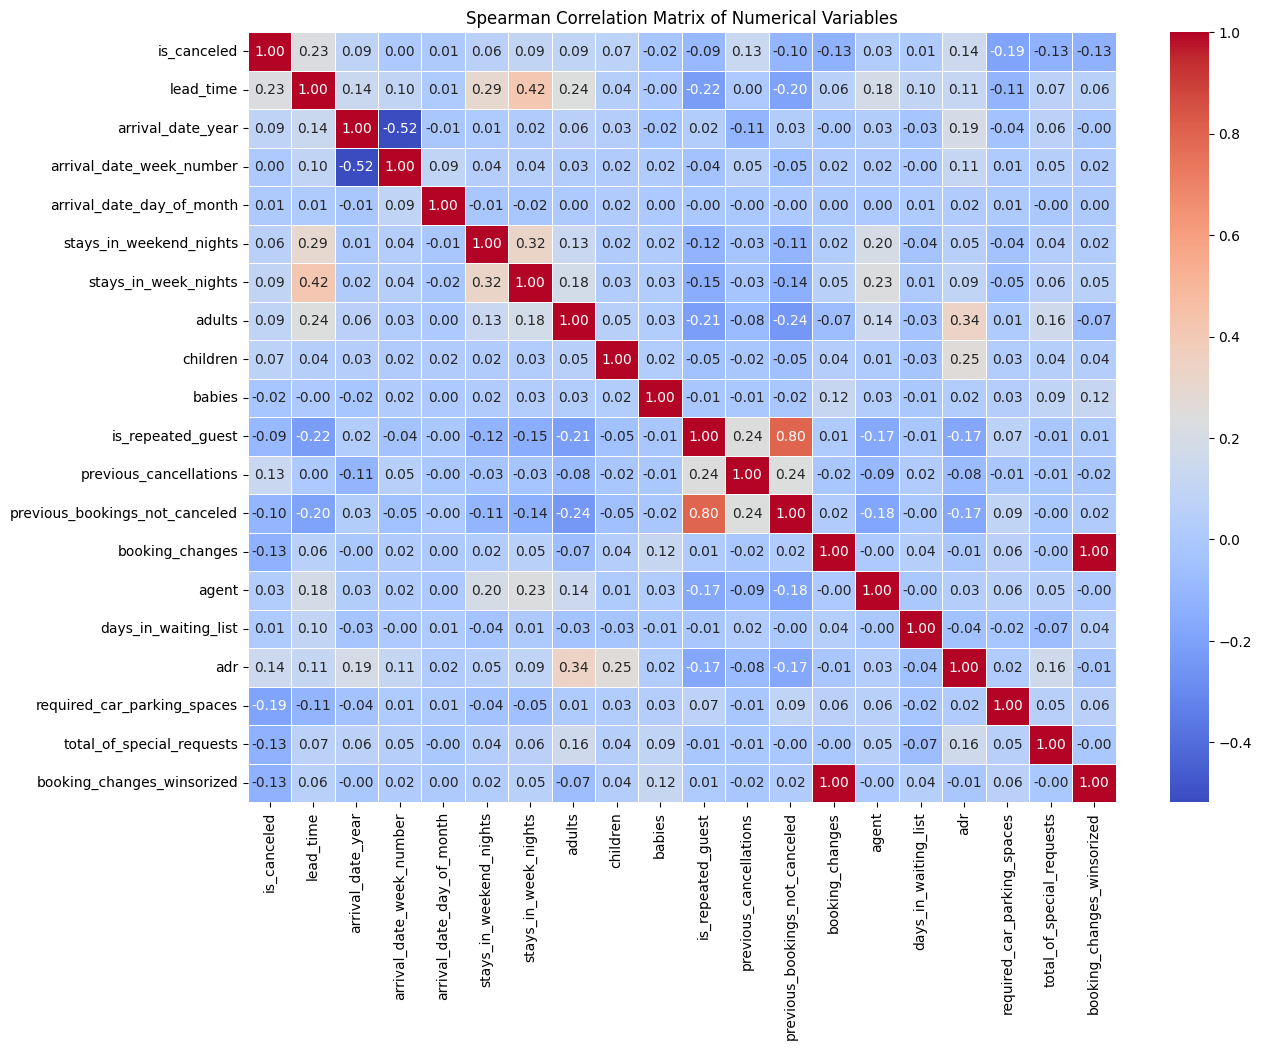

In [243]:
numerical_cols = df.select_dtypes(include=np.number).columns

correlation_matrix_spearman = df[numerical_cols].corr(method='spearman')

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Spearman Correlation Matrix of Numerical Variables')
plt.show()

In [244]:
correlation_matrix_abs = correlation_matrix_spearman.abs()

stacked_correlations = correlation_matrix_abs.stack()

stacked_correlations_df = stacked_correlations.reset_index()
stacked_correlations_df.columns = ['Variable 1', 'Variable 2', 'Spearman Correlation (Absolute)']

high_correlations = stacked_correlations_df[
    (stacked_correlations_df['Spearman Correlation (Absolute)'] >= 0.69) &
    (stacked_correlations_df['Variable 1'] != stacked_correlations_df['Variable 2'])
]

original_stacked = correlation_matrix_spearman.stack().reset_index()
original_stacked.columns = ['Variable 1', 'Variable 2', 'Spearman Correlation']

high_correlations = high_correlations.merge(original_stacked, on=['Variable 1', 'Variable 2'])

high_correlations['Pair'] = high_correlations.apply(
    lambda row: tuple(sorted((row['Variable 1'], row['Variable 2']))), axis=1
)
high_correlations.drop_duplicates(subset=['Pair'], inplace=True)

correlation_table = high_correlations[['Variable 1', 'Variable 2', 'Spearman Correlation']]

print("Pairs of Numerical Variables with Spearman Correlation >= 0.69:")
display(correlation_table.sort_values(by='Spearman Correlation', ascending=False))

Pairs of Numerical Variables with Spearman Correlation >= 0.69:


,Variable 1,Variable 2,Spearman Correlation
2,booking_changes,booking_changes_winsorized,0.999868
0,is_repeated_guest,previous_bookings_not_canceled,0.796420


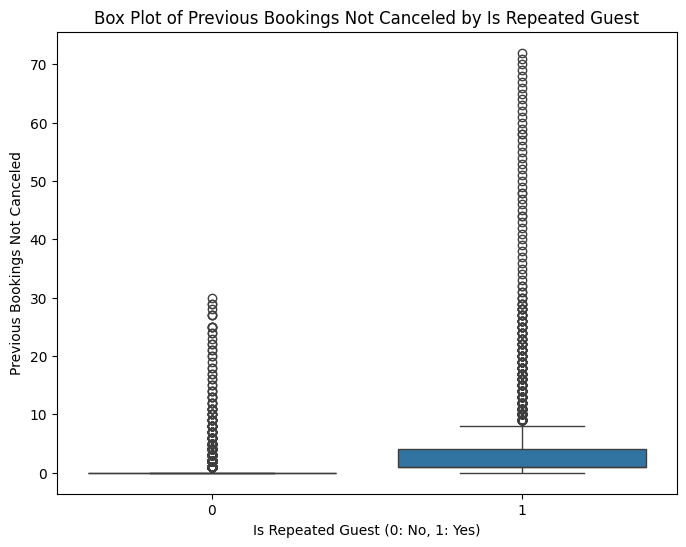

In [245]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='is_repeated_guest', y='previous_bookings_not_canceled')
plt.title('Box Plot of Previous Bookings Not Canceled by Is Repeated Guest')
plt.xlabel('Is Repeated Guest (0: No, 1: Yes)')
plt.ylabel('Previous Bookings Not Canceled')
plt.show()

## Test de Hipotesis


*   h1: El segmento del mercado influye en el tipo de habitación reservada.
*   h2: Un precio promedio alto tiene una relación directa con las cancelaciones.
*   h3: La cantidad de noches reservadas se relaciona con el precio.
*   h4: El tipo de “lead” afecta la tasa de cancelación.






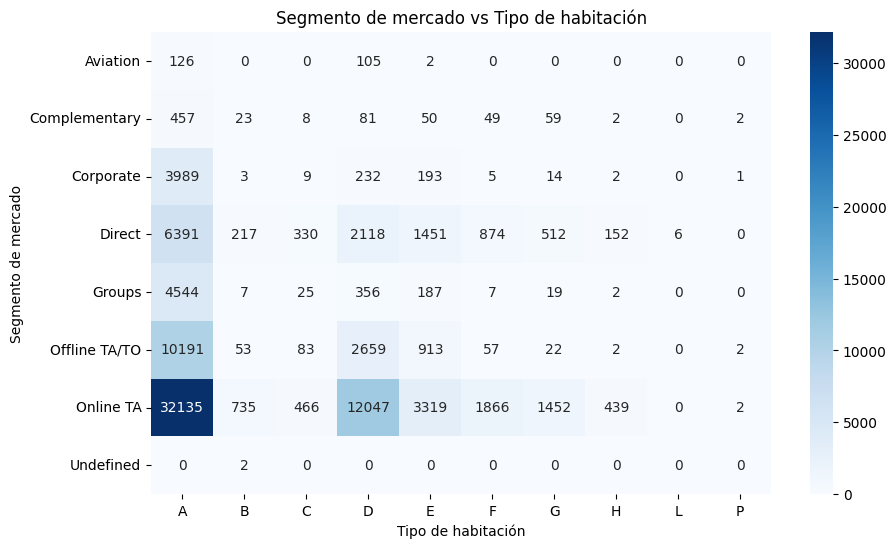

In [246]:
# Crosstab
contingency = pd.crosstab(df["market_segment"], df["reserved_room_type"])

plt.figure(figsize=(10,6))
sns.heatmap(contingency, annot=True, fmt="d", cmap="Blues")
plt.title("Segmento de mercado vs Tipo de habitación")
plt.ylabel("Segmento de mercado")
plt.xlabel("Tipo de habitación")
plt.show()

Utilizamos crosstab dado que ambas variables son categoricas. El grafico de contingencia nos permite ver las dsitribucines conjuntas de las variables, y podemos ver la asociacion o dependencia entre ellas.

In [247]:
#h1
contingency = pd.crosstab(df["market_segment"], df["reserved_room_type"])
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-cuadrado:", chi2, " - p-valor:", p)
if p < 0.05:
    print("Se rechaza la hipótesis nula. El segmento del mercado influye en el tipo de habitación reservada.")

Chi-cuadrado: 6582.209570896093  - p-valor: 0.0
Se rechaza la hipótesis nula. El segmento del mercado influye en el tipo de habitación reservada.


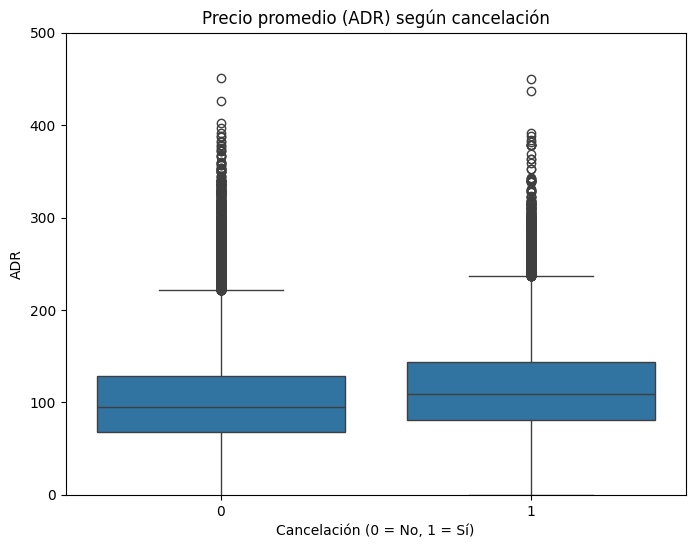

In [248]:
#h2 grafico:
plt.figure(figsize=(8,6))
sns.boxplot(x="is_canceled", y="adr", data=df)
plt.title("Precio promedio (ADR) según cancelación")
plt.xlabel("Cancelación (0 = No, 1 = Sí)")
plt.ylabel("ADR")
plt.ylim(0, 500)
plt.show()

Usamos el t-test dado que tenemos una variable continua (precio) y una binaria (cancelacion), podemos comparar la media del orecuo pomedio en los dos grupos y ver si existe una diferencia entre ellos.

In [249]:

#ttest
canceled = df[df["is_canceled"] == 1]["adr"].dropna()
not_canceled = df[df["is_canceled"] == 0]["adr"].dropna()

t_stat, p = ttest_ind(canceled, not_canceled, equal_var=False)
print("t-test:", t_stat, " - p-valor:", p)
if p < 0.05:
    print("Se rechaza la hipótesis nula. Un precio promedio alto tiene una relación directa con las cancelaciones.")

t-test: 35.2521747370983  - p-valor: 5.681512835317387e-268
Se rechaza la hipótesis nula. Un precio promedio alto tiene una relación directa con las cancelaciones.


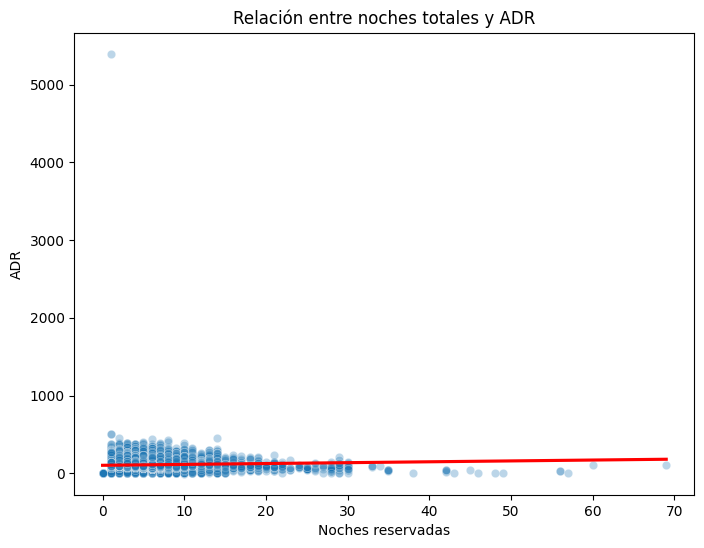

In [250]:
#h3 grafico;
df["total_nights"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]

plt.figure(figsize=(8,6))
sns.scatterplot(x="total_nights", y="adr", alpha=0.3, data=df)
sns.regplot(x="total_nights", y="adr", data=df, scatter=False, color="red")
plt.title("Relación entre noches totales y ADR")
plt.xlabel("Noches reservadas")
plt.ylabel("ADR")
plt.show()

Ambas variables son cuantitativas continuas. Al utilizar Pearson venis la relacion lineal entre estas variables.

In [251]:
#h3:


df["total_nights"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]

corr, p = stats.pearsonr(df["total_nights"], df["adr"])
print("Correlación:", corr, " - p-valor:", p)
if p < 0.05:
    print("Se rechaza la hipótesis nula. La cantidad de noches reservadas se relaciona con el precio.")

Correlación: 0.056615609403948094  - p-valor: 3.888170235287662e-64
Se rechaza la hipótesis nula. La cantidad de noches reservadas se relaciona con el precio.


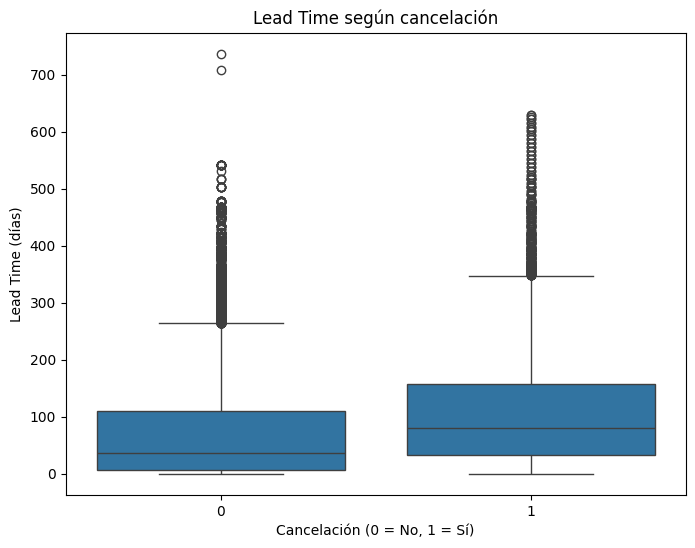

In [252]:
#h4 grafico:
plt.figure(figsize=(8,6))
sns.boxplot(x="is_canceled", y="lead_time", data=df)
plt.title("Lead Time según cancelación")
plt.xlabel("Cancelación (0 = No, 1 = Sí)")
plt.ylabel("Lead Time (días)")
plt.show()


Comparamos la media del lead time y las cancelaciones. Tenemos una variable continua y una binaria.

In [253]:
#h4;
canceled_lead = df[df["is_canceled"] == 1]["lead_time"]
not_canceled_lead = df[df["is_canceled"] == 0]["lead_time"]

t_stat, p = ttest_ind(canceled_lead, not_canceled_lead, equal_var=False)
print("t-test lead_time:", t_stat, " - p-valor:", p)

if p < 0.05:
    print ("Se rechaza la hipótesis nula. El tipo de 'lead' afecta la tasa de cancelación.")

t-test lead_time: 53.40884467407646  - p-valor: 0.0
Se rechaza la hipótesis nula. El tipo de 'lead' afecta la tasa de cancelación.


# **TP 3**

Conclusiones test hipotesis:


*   El segmento del mercado influye en el tipo de habitación reservada.

*  Un precio promedio alto tiene una relación directa con las cancelaciones.

*   La cantidad de noches reservadas se relaciona con el precio.

*   El tipo de 'lead' afecta la tasa de cancelación.

Dada los resultados de los test de hipotesis, consideramos que todos los hallazgos son valiosos para nuestros analaisis.


In [254]:
# Guardar el  DataFrame final en un archivo CSV
df.to_csv('processed_hotel_bookings_final.csv', index=False)

print("DataFrame saved to 'processed_hotel_bookings.csv'")

DataFrame saved to 'processed_hotel_bookings.csv'


In [255]:
from google.colab import files

files.download('processed_hotel_bookings_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Preprocesamiento para machine learning


##Encoding de variables categóricas

Utilizamos one-hot encoding dado que la varaibles categoricas son nominales y no ordinales, es decir que no exsite  jerarquia entre las mismas. Excluimos "reservation status" dado que es nuestro target.

In [256]:

categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols_for_encoding = [col for col in categorical_cols if col not in ['reservation_status', 'reservation_status_date']]

print("Categorical columns to be encoded:", categorical_cols_for_encoding)

# Función para agrupar categorías con baja frecuencia
def group_low_frequency_categories(df, column, max_categories=20, new_category_name='Otros'):
    # Obtener las categorías más frecuentes
    top_categories = df[column].value_counts().nlargest(max_categories).index

    # Reemplazar las categorías no principales con 'Otros'
    df[column] = df[column].apply(lambda x: x if x in top_categories else new_category_name)
    return df

# Aplicar la función a la columna 'country' si tiene más de 20 categorías
if 'country' in categorical_cols_for_encoding:
    if df['country'].nunique() > 20:
        print(f"Agrupando categorías en '{'country'}' a un máximo de 20, el resto como 'Otros'.")
        df = group_low_frequency_categories(df, 'country', max_categories=20, new_category_name='Otros')
    else:
        print(f"La columna 'country' tiene {df['country'].nunique()} categorías, no se agrupa.")

# one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols_for_encoding, dummy_na=False) # dummy_na=False means NaNs are not encoded as a separate column


print("\nDataFrame después de one-hot encoding:", df_encoded.shape)
print("\nPrimeras 5 filas del DataFrame one-hot encoding:")
display(df_encoded.head())

Categorical columns to be encoded: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']
Agrupando categorías en 'country' a un máximo de 20, el resto como 'Otros'.

DataFrame después de one-hot encoding: (89055, 105)

Primeras 5 filas del DataFrame one-hot encoding:


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,2015,27,1,0,0,2,0,0,...,False,False,False,True,False,False,False,False,True,False
1,0,737,2015,27,1,0,0,2,0,0,...,False,False,False,True,False,False,False,False,True,False
2,0,7,2015,27,1,0,1,1,0,0,...,False,False,False,True,False,False,False,False,True,False
3,0,13,2015,27,1,0,1,1,0,0,...,False,False,False,True,False,False,False,False,True,False
4,0,14,2015,27,1,0,2,2,0,0,...,False,False,False,True,False,False,False,False,True,False


### Escalamiento/normalización de variables numéricas

Utilizamos StandarScaler para estandarizar las variables excluyendo las columnas'agent' porque es un Id, 'is_canceled' porque es el traget,y  'arrival_date_year' porque es una fecha.

In [257]:
from sklearn.preprocessing import StandardScaler

# Exculuimos  la variable 'is_canceled' y 'stays_in_week_nights' por multicolinealidad
numerical_cols_encoded = df_encoded.select_dtypes(include=np.number).columns.tolist()
numerical_cols_for_scaling = [col for col in numerical_cols_encoded if col not in ['is_canceled', 'arrival_date_year', 'agent', 'stays_in_week_nights']]

print("Columnas numericas a ser estandarizadas:", numerical_cols_for_scaling)

# StandardScaler
scaler = StandardScaler()

df_encoded[numerical_cols_for_scaling] = scaler.fit_transform(df_encoded[numerical_cols_for_scaling])

print("\nPrimeras 5 filas del DataFrame depspues del scaling:")
display(df_encoded.head())

Columnas numericas a ser estandarizadas: ['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'booking_changes_winsorized', 'total_nights']

Primeras 5 filas del DataFrame depspues del scaling:


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,3.050034,2015,0.010252,-1.6778,-0.971365,0,0.203064,-0.329533,-0.094447,...,False,False,False,True,False,False,False,False,True,False
1,0,7.645409,2015,0.010252,-1.6778,-0.971365,0,0.203064,-0.329533,-0.094447,...,False,False,False,True,False,False,False,False,True,False
2,0,-0.847310,2015,0.010252,-1.6778,-0.971365,1,-1.397700,-0.329533,-0.094447,...,False,False,False,True,False,False,False,False,True,False
3,0,-0.777507,2015,0.010252,-1.6778,-0.971365,1,-1.397700,-0.329533,-0.094447,...,False,False,False,True,False,False,False,False,True,False
4,0,-0.765873,2015,0.010252,-1.6778,-0.971365,2,0.203064,-0.329533,-0.094447,...,False,False,False,True,False,False,False,False,True,False


Revision de Multicolinealidad

In [258]:
if 'stays_in_week_nights' in df.columns:
    df.drop('stays_in_week_nights', axis=1, inplace=True)
    print("Columna 'stays_in_week_nights' eliminada del DataFrame df.")
else:
    print("La columna 'stays_in_week_nights' no se encuentra en el DataFrame df.")

# Verificar las columnas restantes
print("Columnas actuales en el DataFrame df:")
display(df.columns)

Columna 'stays_in_week_nights' eliminada del DataFrame df.
Columnas actuales en el DataFrame df:


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights', 'adults',
       'children', 'babies', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
       'booking_changes_winsorized', 'total_nights'],
      dtype='object')

## Modelo de clasificación

Separamos en train y test la base y establecemos la columna de is_canceled como el target

In [259]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer # Importar SimpleImputer

# Establecemos una semilla para la reproducibilidad
semilla = 42

# Identificar todas las columnas numéricas en df_encoded que podrían contener NaNs
numerical_cols_to_process = df_encoded.select_dtypes(include=[np.number]).columns.tolist()

# Excluir la variable objetivo 'is_canceled' si está en la lista de columnas numéricas
if 'is_canceled' in numerical_cols_to_process:
    numerical_cols_to_process.remove('is_canceled')

# Convertir cualquier tipo de entero nullable de pandas ('Int64') a float para asegurar que pd.NA se convierta a np.nan
for col in numerical_cols_to_process:
    if df_encoded[col].dtype == 'Int64':
        df_encoded[col] = df_encoded[col].astype(float)

# Aplicar SimpleImputer a todas las columnas numéricas identificadas que no son booleanas
# (las booleanas True/False no deberían tener NaNs y ya son 0/1)
imputer = SimpleImputer(strategy='mean')
if len(numerical_cols_to_process) > 0:
    df_encoded[numerical_cols_to_process] = imputer.fit_transform(df_encoded[numerical_cols_to_process])

# X serán todas las columnas excepto 'is_canceled' (la target) y otras columnas no numéricas o redundantes.
# 'reservation_status' y 'reservation_status_date' son columnas de tipo 'object' que deben ser excluidas de X.
X = df_encoded.drop(columns=['is_canceled', 'reservation_status', 'reservation_status_date'])
y = df_encoded['is_canceled']

# Verificar NaNs restantes en X antes del split
print(f"NaNs restantes en X antes del split: {X.isnull().sum().sum()}")

# Realizamos el split 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=semilla)

# Verificamos el tamaño de los datos
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de y_test: {y_test.shape}")

NaNs restantes en X antes del split: 0
Tamaño de X_train: (62338, 102)
Tamaño de X_test: (26717, 102)
Tamaño de y_train: (62338,)
Tamaño de y_test: (26717,)


In [260]:
# Función para guardar los resultados
def guardo_resultados(nombre_modelo, y_test, y_pred, tiempo_ejecucion):

    # Aquí calculamos las métricas de evaluación del modelo
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

    # Calcular las métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    rocauc = roc_auc_score(y_test, y_pred)

    # Crear un diccionario con los resultados
    resultados_dict = {
        'Modelo': [nombre_modelo],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'ROCAUC': [rocauc],
        'F1-Score': [f1],
        'Tiempo': [tiempo_ejecucion]
    }

    # Convertir el diccionario a un DataFrame
    resultados_df = pd.DataFrame(resultados_dict)

    return resultados_df

In [261]:
def matriz_confusion(y_test, y_pred):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    # Matriz de confusión sin normalizar
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix,
                xticklabels=['OK (P)', 'Default (P)'] or [],
                yticklabels=['OK', 'Default'] or [],
                annot=True, fmt='d',
                ax=ax[0],
                square=True, linewidth=1)
    ax[0].set_title('Sin Normalizar')
    ax[0].set_xlabel('Predicción')
    ax[0].set_ylabel('Clase Verdadera')

    # Matriz de confusión normalizada
    conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
    sns.heatmap(conf_matrix_norm,
                xticklabels=['OK (P)', 'Default (P)'] or [],
                yticklabels=['OK', 'Default'] or [],
                annot=True, fmt='.2%',
                ax=ax[1],
                square=True, linewidth=1)
    ax[1].set_title('Normalizada')
    ax[1].set_xlabel('Predicción')
    ax[1].set_ylabel('Clase Verdadera')

    # Título general
    plt.suptitle('Matriz de Confusión')
    plt.show()

In [262]:
import time
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Función para entrenar el modelo, guardar métricas y mostrar matriz de confusión
def entrenar_modelo(modelo, nombre_modelo, X_train, y_train, X_test, y_test, tf=False):

    # Entrenamos el modelo y medimos el tiempo de ejecución
    start = time.time()
    if tf:
        modelo.fit(X_train, y_train)
    else:
        modelo = modelo.fit(X_train, y_train)
    end = time.time()
    tiempo_ejecucion = end - start

    # Predecimos
    y_pred = modelo.predict(X_test) if not tf else np.where(modelo.predict(X_test) > 0.5, 1, 0)

    # Guardamos los resultados en el DataFrame
    resultados = guardo_resultados(nombre_modelo, y_test, y_pred, tiempo_ejecucion)

    global resultados_df
    if 'resultados_df' not in globals():
        resultados_df = pd.DataFrame()
    resultados_df = pd.concat([resultados_df, resultados], ignore_index=True)

    # Mostramos los resultados de este modelo
    print("Resultados para el modelo:", nombre_modelo)
    print(resultados, "\n")

    # Mostramos la matriz de confusión
    matriz_confusion(y_test, y_pred)

In [263]:
# El dataset ya fue dividido en X_train, X_test, y_train, y_test en la celda 'FI_7nWGHKsZK'.
# La variable objetivo 'is_canceled' ya ha sido correctamente asignada a 'y_train' y 'y_test'.

print("Los conjuntos de entrenamiento y prueba ya están definidos:")
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de y_test: {y_test.shape}")

Los conjuntos de entrenamiento y prueba ya están definidos:
Tamaño de X_train: (62338, 102)
Tamaño de X_test: (26717, 102)
Tamaño de y_train: (62338,)
Tamaño de y_test: (26717,)


##Regresión logística

In [264]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(
    solver='liblinear',
    random_state=semilla)

Resultados para el modelo: Regresión Logística
                Modelo  Accuracy  Precision    Recall   ROCAUC  F1-Score  \
0  Regresión Logística  0.794101   0.676043  0.491003  0.70051  0.568853   

     Tiempo  
0  1.398403   



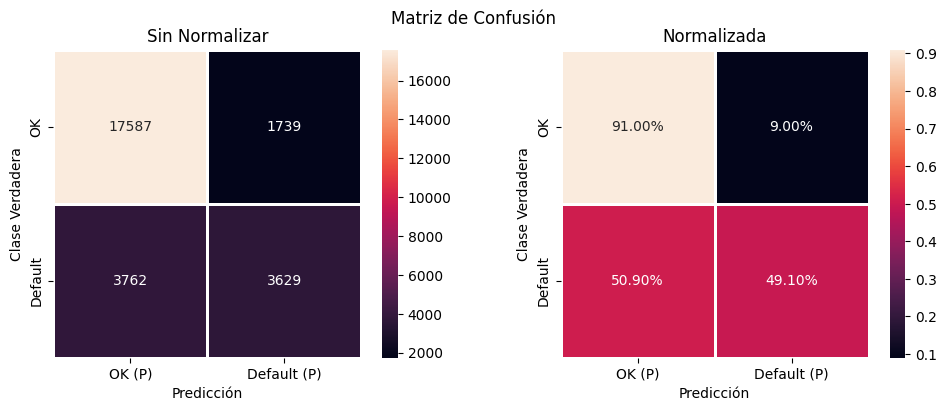

In [265]:
entrenar_modelo(modelo, 'Regresión Logística', X_train, y_train, X_test, y_test)


In [266]:
resultados_df

,Modelo,Accuracy,Precision,Recall,ROCAUC,F1-Score,Tiempo
0,Regresión Logística,0.790603,0.680855,0.496382,0.701956,0.574165,2.419443
1,Regresión Logística,0.794101,0.676043,0.491003,0.700510,0.568853,1.398403


##Conclusión del Modelo de Regresión Logística
El modelo de Regresión Logística ofrece un Accuracy aceptable del 79.06%.

Su principal debilidad es el Recall (49.64%), lo que significa que el modelo no logra identificar casi la mitad de los casos positivos reales (muchos falsos negativos); predice que gente que no va a cancelar si lo va a hacer (erroneamente) . Esto resulta en un F1-Score moderado (0.57).

## Proyecto de producción
En un contexto real dentro de un hotel, este sistema de predicción de cancelaciones funcionaría como parte del proceso operativo de gestión de reservas. Lo más lógico sería que el modelo genere una predicción al momento en que un cliente realiza una reserva, por lo que la solución debería contar con un mecanismo de consulta casi inmediata, similar a una API interna. Esto permitiría que el personal del hotel o el motor de reservas evalúe el riesgo de cancelación en tiempo real y tome decisiones informadas, como solicitar un depósito, ofrecer condiciones más flexibles o activar campañas de retención.

La actualización de la información no necesitaría ser diaria; basta con un proceso semanal, ya que los patrones de comportamiento no cambian drásticamente de un día al otro. El ideal sería automatizar esta incorporación de datos mediante un flujo programado, evitando que el equipo tenga que cargar datos manualmente.

En cuanto a la infraestructura, resulta natural imaginar el proyecto funcionando en un entorno cloud, ya que eso facilitaría el acceso desde distintas áreas del hotel y permitiría escalar si el volumen de reservas creciera. También sería necesario contar con una base de datos donde almacenar las predicciones históricas, los logs y cualquier anomalía, de modo que se pueda evaluar la salud del sistema con el tiempo.

Para el mantenimiento, sería clave que el modelo no quede “abandonado”. Tanto un perfil técnico (como un analista o científico de datos) como alguien del negocio deberían revisarlo periódicamente. Si se observa que la diferencia entre lo que el modelo predice y lo que realmente ocurre aumenta, o si cambian los patrones de reservas por motivos estacionales o económicos, eso indicaría que el modelo debe reentrenarse. También sería importante monitorear señales como el drift, errores recurrentes o caídas en la precisión.

